# Analysis of the motor vehicle collisions in NYC part II

## 2. Data exploration

### &nbsp;&nbsp;&nbsp;&nbsp;2.1 Importing cleaned data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('cleaned_data.csv')

### &nbsp;&nbsp;&nbsp;&nbsp;2.2 Contributing factors in collisions for the NYC

In [3]:
factor_cols = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

all_factors = df[factor_cols].stack().str.strip().str.title()

unique_count = all_factors.nunique()
print(f"Number of unique contributing factors: {unique_count}")

factor_counts = all_factors.value_counts()
factor_counts.head(10)

Number of unique contributing factors: 59


Unspecified                       1402557
Driver Inattention/Distraction     274558
Failure To Yield Right-Of-Way       77869
Following Too Closely               71841
Other Vehicular                     57435
Backing Unsafely                    49273
Fatigued/Drowsy                     37724
Passing Or Lane Usage Improper      36210
Turning Improperly                  34500
Passing Too Closely                 31647
Name: count, dtype: int64

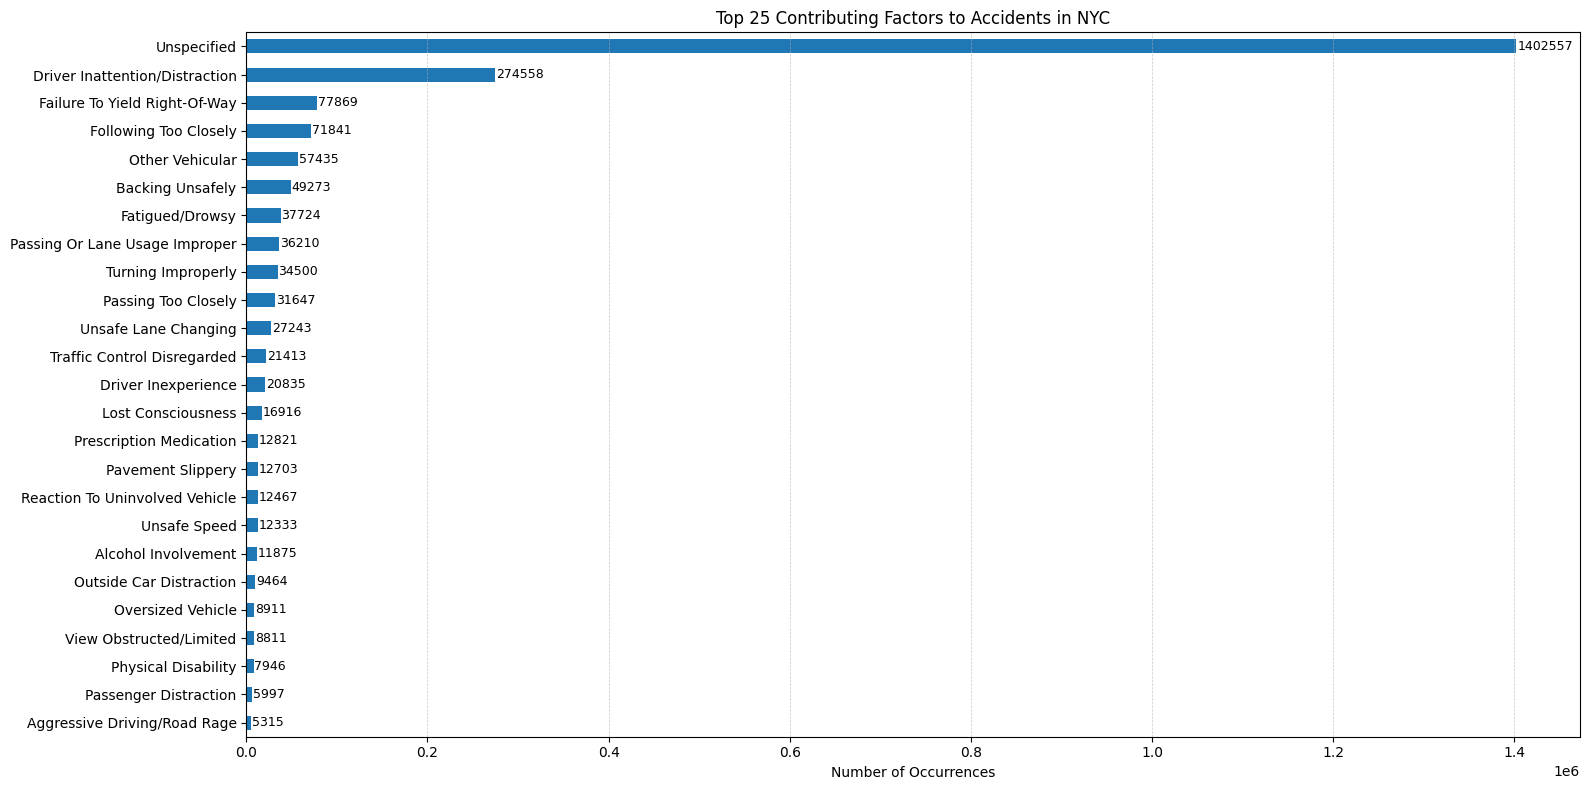

In [4]:
top_factors = factor_counts.head(25)

# Plot
ax = top_factors.plot(kind='barh', figsize=(16, 8))
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Top 25 Contributing Factors to Accidents in NYC')
plt.xlabel('Number of Occurrences')
plt.gca().invert_yaxis()
plt.tight_layout()

# Add labels beside bars
for i, v in enumerate(top_factors.values):
    ax.text(v + 1000, i, str(v), va='center', fontsize=9)  # Adjust 1000 as needed for spacing

plt.savefig('plots/top25_contributing_factors_all_NYC.png', dpi=300)
plt.show()

The most frequently occurring value for the contributing factor is "Unspecified".

In [5]:
sum_factor_counts = factor_counts.sum()
print(f'Sum of all contributing factors: {sum_factor_counts}')

sum_unspecified = factor_counts[factor_counts.index == 'Unspecified'].sum()
print(f"Sum of 'Unspecified' counts: {sum_unspecified}")

unspecified_percentage = (sum_unspecified / sum_factor_counts) * 100
print(f"'Unspecified' factor accounts for {unspecified_percentage:.2f}% of all contributing factors.")

Sum of all contributing factors: 2304256
Sum of 'Unspecified' counts: 1402557
'Unspecified' factor accounts for 60.87% of all contributing factors.


Since "Unspecified" lacks informative value, it was excluded from the diagram to enhance the visibility of other contributing factors.

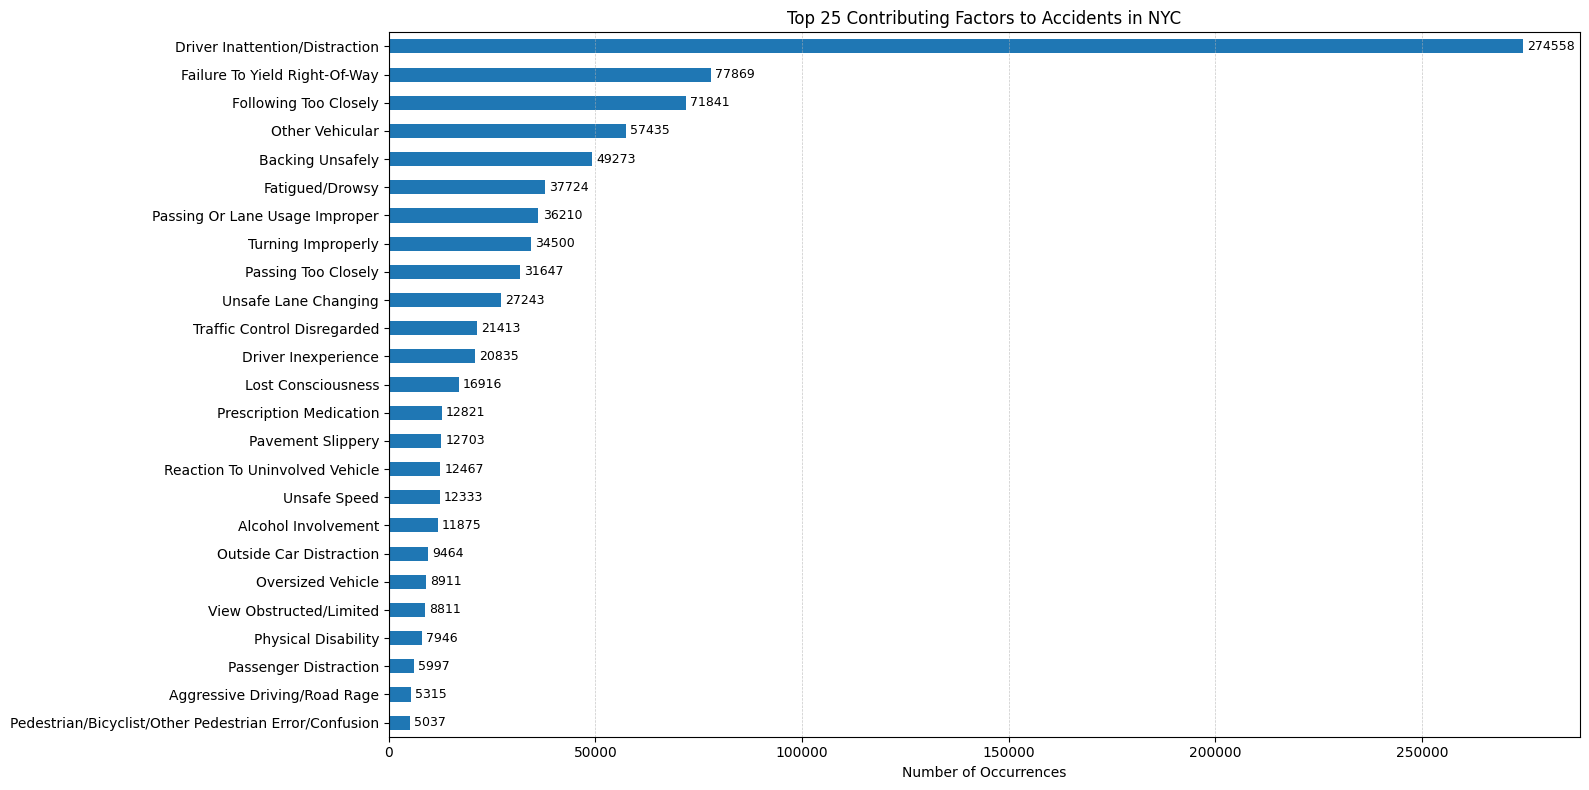

In [6]:
factor_counts_filtered = factor_counts[factor_counts.index != 'Unspecified']
top_factors = factor_counts_filtered.head(25)

# Plot
ax = top_factors.plot(kind='barh', figsize=(16, 8))
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Top 25 Contributing Factors to Accidents in NYC')
plt.xlabel('Number of Occurrences')
plt.gca().invert_yaxis()
plt.tight_layout()

# Add labels beside bars
for i, v in enumerate(top_factors.values):
    ax.text(v + 1000, i, str(v), va='center', fontsize=9)  # Adjust 1000 as needed for spacing

plt.savefig('plots/top25_contributing_factors_NYC.png', dpi=300)
plt.show()

In [7]:
sum_factor_counts_filtered = factor_counts[factor_counts.index != 'Unspecified'].sum()
print(f'Sum of informative factors: {sum_factor_counts_filtered}')

Sum of informative factors: 901699


In [8]:
# Exclude 'Unspecified'
factor_counts_filtered = factor_counts[factor_counts.index != 'Unspecified']

# Identify the top 10 factors overall
top_10 = factor_counts_filtered.head(10)

# Creating "others" for the rest (exclude top 10 from the filtered factors)
others = factor_counts_filtered.drop(top_10.index)

# "others" as 100% and get the top 10 factors inside "others"
top_10_of_others = others.head(10)

# Sum of all "others" factors (used as new total)
others_sum = others.sum()

print("Top 10 factors (overall):")
for factor, count in top_10.items():
    percentage = (count / factor_counts_filtered.sum()) * 100
    print(f" - {factor}: {percentage:.2f}%")
    
other_percentage = (others_sum / factor_counts_filtered.sum()) * 100
print(f'All other factors combined account for {other_percentage:.2f}% of informative contributing factors (each less than 3%).')

print("\nTop 10 factors within 'other' (treated as 100%):")
for factor, count in top_10_of_others.items():
    percentage = (count / others_sum) * 100
    print(f" - {factor}: {percentage:.2f}%")

# The rest after those 10 in "others"
rest_after_top_10_of_others = others_sum - top_10_of_others.sum()
rest_percentage = (rest_after_top_10_of_others / others_sum) * 100
print(f"\nOther factors in 'other' combined account for {rest_percentage:.2f}% of the 'others' group.")

Top 10 factors (overall):
 - Driver Inattention/Distraction: 30.45%
 - Failure To Yield Right-Of-Way: 8.64%
 - Following Too Closely: 7.97%
 - Other Vehicular: 6.37%
 - Backing Unsafely: 5.46%
 - Fatigued/Drowsy: 4.18%
 - Passing Or Lane Usage Improper: 4.02%
 - Turning Improperly: 3.83%
 - Passing Too Closely: 3.51%
 - Unsafe Lane Changing: 3.02%
All other factors combined account for 22.56% of informative contributing factors (each less than 3%).

Top 10 factors within 'other' (treated as 100%):
 - Traffic Control Disregarded: 10.53%
 - Driver Inexperience: 10.24%
 - Lost Consciousness: 8.32%
 - Prescription Medication: 6.30%
 - Pavement Slippery: 6.25%
 - Reaction To Uninvolved Vehicle: 6.13%
 - Unsafe Speed: 6.06%
 - Alcohol Involvement: 5.84%
 - Outside Car Distraction: 4.65%
 - Oversized Vehicle: 4.38%

Other factors in 'other' combined account for 31.30% of the 'others' group.


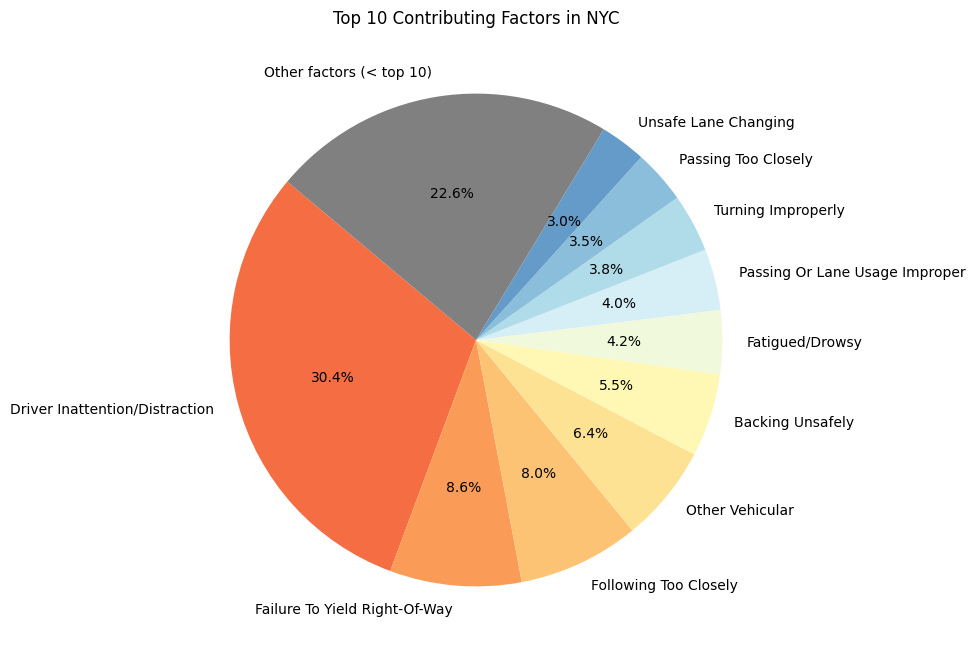

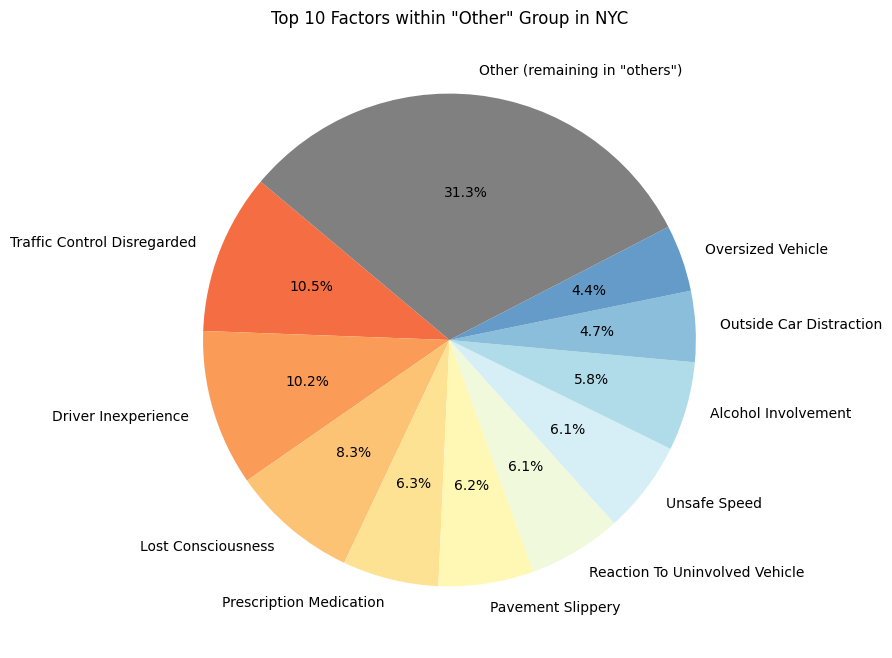

In [9]:
# First pie chart (Top 10 + Others)
labels_1 = list(top_10.index) + ['Other factors (< top 10)']
sizes_1 = list(top_10.values) + [others_sum]
colors_1 = plt.colormaps['RdYlBu'](np.linspace(0.2, 0.9, len(labels_1)))
colors_1[-1] = [0.5, 0.5, 0.5, 1.0]

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes_1, labels=labels_1, colors=colors_1, autopct='%1.1f%%', startangle=140)
ax1.set_title('Top 10 Contributing Factors in NYC')
ax1.set_aspect('equal')

plt.savefig('plots/top10_contributing_factors_percentage_NYC.png', dpi=300, bbox_inches='tight')

# Second pie chart (Top 10 of Others)
labels_2 = list(top_10_of_others.index) + ['Other (remaining in "others")']
sizes_2 = list(top_10_of_others.values) + [rest_after_top_10_of_others]
colors_2 = plt.colormaps['RdYlBu'](np.linspace(0.2, 0.9, len(labels_2)))
colors_2[-1] = [0.5, 0.5, 0.5, 1.0]

fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.pie(sizes_2, labels=labels_2, colors=colors_2, autopct='%1.1f%%', startangle=140)
ax2.set_title('Top 10 Factors within "Other" Group in NYC')
ax2.set_aspect('equal')

plt.savefig('plots/top10_contributing_factors_percentage_NYC_other.png', dpi=300, bbox_inches='tight')
plt.show()

### &nbsp;&nbsp;&nbsp;&nbsp;2.3 Contributing factors for boroughs

In [10]:
# Suming factor counts per borough
# Melting the factor columns to long format
df_factors = df[['BOROUGH'] + factor_cols].melt(id_vars='BOROUGH', value_vars=factor_cols, var_name='FACTOR_COLUMN', value_name='FACTOR')

# Droping rows where factor is missing
df_factors = df_factors.dropna(subset=['FACTOR'])

# Excluding 'Unspecified'
df_factors_filtered = df_factors[df_factors['FACTOR'] != 'Unspecified']

# Grouping by BOROUGH and count all informative (non-Unspecified) factors
total_factors_per_borough = df_factors_filtered.groupby('BOROUGH').size().sort_values(ascending=False)

print(total_factors_per_borough)

total_count = total_factors_per_borough.sum()
print(f"\nTotal informative contributing factors for all boroughs: {total_count}")

BOROUGH
QUEENS           267379
BROOKLYN         238065
MANHATTAN        227725
BRONX            123777
STATEN ISLAND     44753
dtype: int64

Total informative contributing factors for all boroughs: 901699


In [11]:
# Group by factor and borough
factor_borough_counts = df_factors.groupby(['FACTOR', 'BOROUGH']).size().unstack(fill_value=0)

# Sort by total occurrences across boroughs (row sum)
factor_borough_counts['TOTAL'] = factor_borough_counts.sum(axis=1)
factor_borough_counts = factor_borough_counts.sort_values('TOTAL', ascending=False)

factor_borough_counts.head(10)

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,TOTAL
FACTOR,,,,,,
Unspecified,207511,437243,268799,415930,73074,1402557
Driver Inattention/Distraction,33537,68262,70483,86734,15542,274558
Failure to Yield Right-of-Way,8293,23729,13613,28655,3579,77869
Following Too Closely,11256,18934,13562,24200,3889,71841
Other Vehicular,11327,10727,24469,8610,2302,57435
Backing Unsafely,7030,13875,9858,15742,2768,49273
Fatigued/Drowsy,3243,10145,9672,12739,1925,37724
Passing or Lane Usage Improper,4820,9909,10077,10345,1059,36210
Turning Improperly,4720,8218,11390,8751,1421,34500


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2.1 Top 5 Contributing Factors by Borough

In [12]:
# Group by BOROUGH and FACTOR, and count occurrences
top_factors_by_borough = (df_factors_filtered.groupby(['BOROUGH', 'FACTOR']).size().reset_index(name='COUNT'))

# Sort each borough group by count descending and take top 10
top_5_per_borough = (top_factors_by_borough.sort_values(['BOROUGH', 'COUNT'], ascending=[True, False]).groupby('BOROUGH').head(5))

top_5_per_borough = top_5_per_borough.copy()

# Createing a new column for total factors in that borough
# Mapping the 'BOROUGH' column to its corresponding total count
top_5_per_borough['TOTAL_IN_BOROUGH'] = top_5_per_borough['BOROUGH'].map(total_factors_per_borough)

# Calculating the percentage
top_5_per_borough['PERCENT'] = ((top_5_per_borough['COUNT'] / top_5_per_borough['TOTAL_IN_BOROUGH']) * 100).round(2)

In [13]:
top_5_per_borough

,BOROUGH,FACTOR,COUNT,TOTAL_IN_BOROUGH,PERCENT
11,BRONX,Driver Inattention/Distraction,33537,123777,27.09
32,BRONX,Other Vehicular,11327,123777,9.15
21,BRONX,Following Too Closely,11256,123777,9.09
18,BRONX,Failure to Yield Right-of-Way,8293,123777,6.70
6,BRONX,Backing Unsafely,7030,123777,5.68
71,BROOKLYN,Driver Inattention/Distraction,68262,238065,28.67
78,BROOKLYN,Failure to Yield Right-of-Way,23729,238065,9.97
81,BROOKLYN,Following Too Closely,18934,238065,7.95
66,BROOKLYN,Backing Unsafely,13875,238065,5.83
92,BROOKLYN,Other Vehicular,10727,238065,4.51


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2.1.1 Top 5 Contributing Factors by Borough (based on count of occurrences)

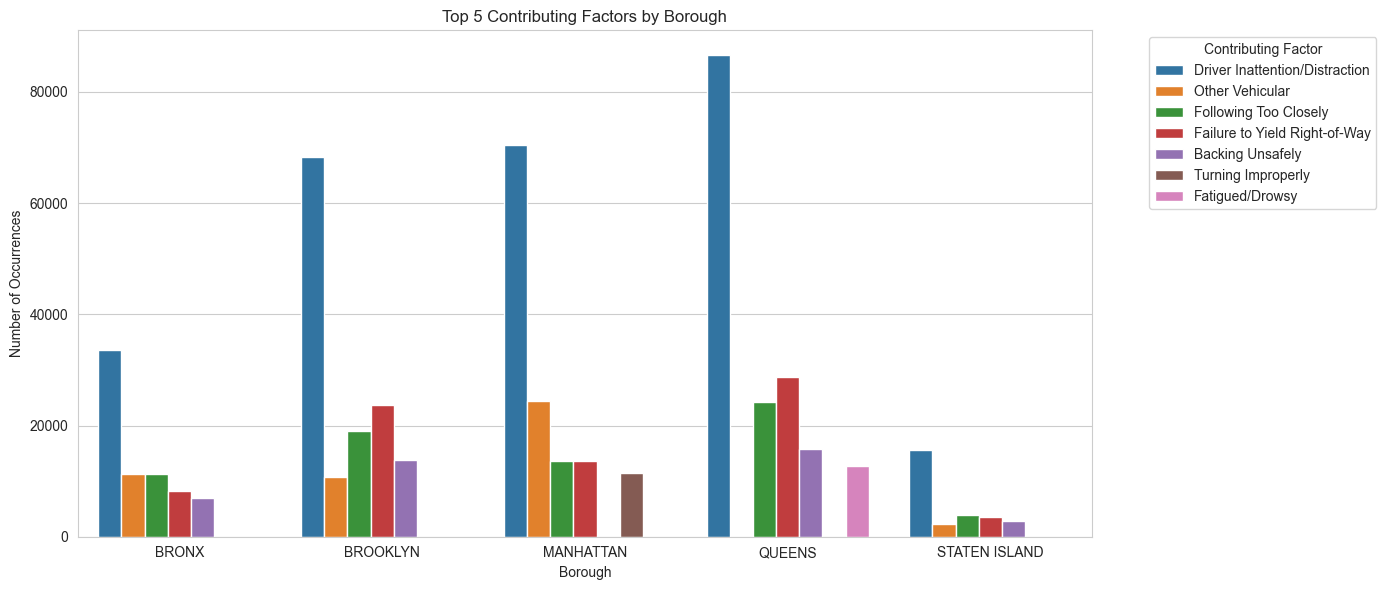

In [14]:
# Sum of contributing factors in each borough (BOROUGH, FACTOR, COUNT)
plot_df = top_5_per_borough[['BOROUGH', 'FACTOR', 'COUNT']].copy()

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Bar plot
sns.barplot(data=plot_df, x='BOROUGH', y='COUNT', hue='FACTOR', dodge=True)

plt.title("Top 5 Contributing Factors by Borough")
plt.ylabel("Number of Occurrences")
plt.xlabel("Borough")
plt.legend(title="Contributing Factor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/top5_contributing_factors_by_borough_NYC.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2.1.2 Top 5 Contributing Factors by Borough (% of total contributing factors in each borough)

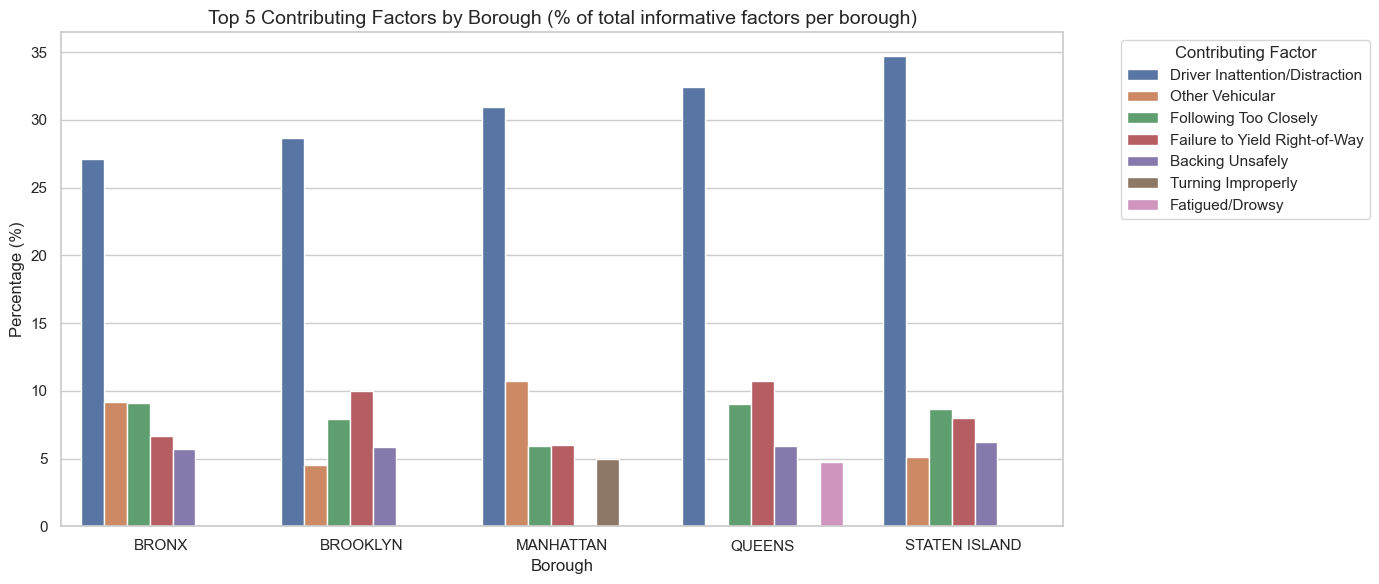

In [15]:
# Plot style and size
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')

# Create the percentage barplot
ax = sns.barplot(data=top_5_per_borough, x='BOROUGH', y='PERCENT', hue='FACTOR', dodge=True)

# Titles and labels
ax.set_title('Top 5 Contributing Factors by Borough (% of total informative factors per borough)', fontsize=14)
ax.set_xlabel('Borough', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)

# Legend placement
plt.legend(title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout fix
plt.tight_layout()
plt.savefig('plots/top5_contributing_factors_by_borough_in_borough.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2.2 Top 5 Contributing Factors by Borough (% of total contributing factors in each borough), with number of victims

In [16]:
# Melt the factor columns, keep BOROUGH, KILLED, and INJURED columns
df_factors = df[['BOROUGH', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED'] + factor_cols] \
    .melt(id_vars=['BOROUGH', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED'],value_vars=factor_cols, var_name='FACTOR_COLUMN', value_name='FACTOR')

# Clean data: drop missing and 'Unspecified'
df_factors = df_factors.dropna(subset=['FACTOR'])
df_factors = df_factors[df_factors['FACTOR'].str.strip().str.title() != 'Unspecified']

df_factors['FACTOR'] = df_factors['FACTOR'].str.strip().str.title()

# Group by BOROUGH and FACTOR, sum KILLED and INJURED
grouped = (df_factors.groupby(['BOROUGH', 'FACTOR'])[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED']].sum().reset_index() \
    .rename(columns={'NUMBER OF PERSONS KILLED': 'TOTAL_PERSONS_KILLED','NUMBER OF PERSONS INJURED': 'TOTAL_PERSONS_INJURED'}))

# For each borough, get top 5 factors by TOTAL_PERSONS_KILLED
top5_factors_by_borough = (grouped.sort_values(['BOROUGH', 'TOTAL_PERSONS_KILLED'], ascending=[True, False]).groupby('BOROUGH').head(5).reset_index(drop=True))

In [17]:
top5_factors_by_borough.head()

,BOROUGH,FACTOR,TOTAL_PERSONS_KILLED,TOTAL_PERSONS_INJURED
0,BRONX,Driver Inattention/Distraction,37,11232
1,BRONX,Unsafe Speed,19,1746
2,BRONX,Traffic Control Disregarded,17,2161
3,BRONX,Failure To Yield Right-Of-Way,14,4304
4,BRONX,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,13,701


In [18]:
# Group all factors by borough and factor, summing killed and injured
grouped = (df_factors.groupby(['BOROUGH', 'FACTOR'])[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED']].sum().reset_index() \
    .rename(columns={'NUMBER OF PERSONS KILLED': 'TOTAL_PERSONS_KILLED', 'NUMBER OF PERSONS INJURED': 'TOTAL_PERSONS_INJURED'}))

# Get top 5 factors by TOTAL_PERSONS_KILLED per borough
top5_factors_by_borough = (grouped.sort_values(['BOROUGH', 'TOTAL_PERSONS_KILLED'], ascending=[True, False]).groupby('BOROUGH').head(5).reset_index(drop=True))

# Calculating borough totals from the full grouped data
totals_per_borough = grouped.groupby('BOROUGH')[['TOTAL_PERSONS_KILLED', 'TOTAL_PERSONS_INJURED']].sum().reset_index()
totals_per_borough = totals_per_borough.rename(columns={'TOTAL_PERSONS_KILLED': 'BOROUGH_TOTAL_KILLED', 'TOTAL_PERSONS_INJURED': 'BOROUGH_TOTAL_INJURED'})

# Merging totals into top5 dataframe
top5_factors_by_borough = top5_factors_by_borough.merge(totals_per_borough, on='BOROUGH')

# Percentages
top5_factors_by_borough['PERCENT_KILLED'] = (
    top5_factors_by_borough['TOTAL_PERSONS_KILLED'] / top5_factors_by_borough['BOROUGH_TOTAL_KILLED'] * 100).round(2)

top5_factors_by_borough['PERCENT_INJURED'] = (
    top5_factors_by_borough['TOTAL_PERSONS_INJURED'] / top5_factors_by_borough['BOROUGH_TOTAL_INJURED'] * 100).round(2)

In [19]:
top5_factors_by_borough.tail(15)

,BOROUGH,FACTOR,TOTAL_PERSONS_KILLED,TOTAL_PERSONS_INJURED,BOROUGH_TOTAL_KILLED,BOROUGH_TOTAL_INJURED,PERCENT_KILLED,PERCENT_INJURED
10,MANHATTAN,Driver Inattention/Distraction,40,13124,165,42013,24.24,31.24
11,MANHATTAN,Failure To Yield Right-Of-Way,32,4414,165,42013,19.39,10.51
12,MANHATTAN,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,15,1070,165,42013,9.09,2.55
13,MANHATTAN,Other Vehicular,13,3386,165,42013,7.88,8.06
14,MANHATTAN,Unsafe Speed,10,798,165,42013,6.06,1.90
15,QUEENS,Traffic Control Disregarded,54,4497,289,79376,18.69,5.67
16,QUEENS,Unsafe Speed,51,2605,289,79376,17.65,3.28
17,QUEENS,Driver Inattention/Distraction,45,24559,289,79376,15.57,30.94
18,QUEENS,Failure To Yield Right-Of-Way,40,11446,289,79376,13.84,14.42
19,QUEENS,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,13,560,289,79376,4.50,0.71


In [20]:
print(top5_factors_by_borough.columns)

Index(['BOROUGH', 'FACTOR', 'TOTAL_PERSONS_KILLED', 'TOTAL_PERSONS_INJURED',
       'BOROUGH_TOTAL_KILLED', 'BOROUGH_TOTAL_INJURED', 'PERCENT_KILLED',
       'PERCENT_INJURED'],
      dtype='object')


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2.2.1 Top 5 Contributing Factors by Borough - Percentage of Persons Killed by Factor

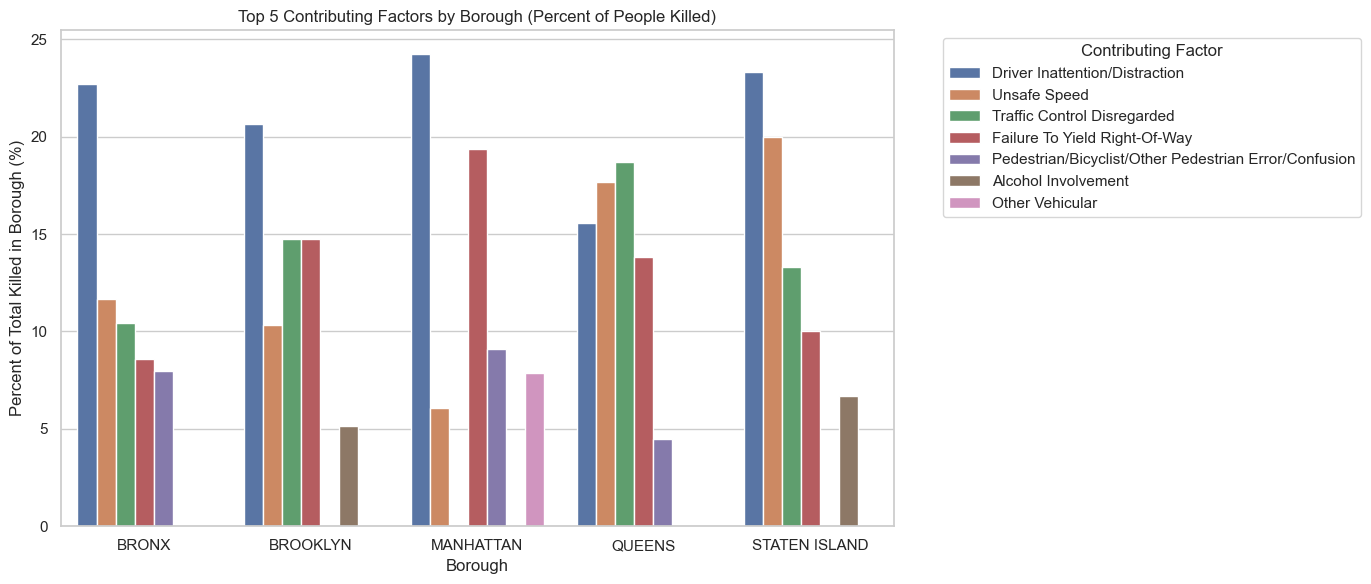

In [21]:
# Plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Bar plot: each bar is a factor within a borough, height is percent killed
sns.barplot(data=top5_factors_by_borough, x='BOROUGH', y='PERCENT_KILLED', hue='FACTOR', dodge=True)

plt.title("Top 5 Contributing Factors by Borough (Percent of People Killed)")
plt.ylabel("Percent of Total Killed in Borough (%)")
plt.xlabel("Borough")
plt.legend(title="Contributing Factor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/top5_contributing_factors_for_killed_by_borough_in_borough.png', dpi=300)
plt.show()

Percent of total persons killed per borough:

In [22]:
# Total victims per borough
totals_per_borough['TOTAL_VICTIMS'] = (totals_per_borough['BOROUGH_TOTAL_KILLED'] + totals_per_borough['BOROUGH_TOTAL_INJURED'])

# Total of killed across all boroughs
grand_total_killed = totals_per_borough['BOROUGH_TOTAL_KILLED'].sum()

# Percent of killed per borough from total killed
totals_per_borough['PERCENT_OF_TOTAL_KILLED_BOROUGH'] = (totals_per_borough['BOROUGH_TOTAL_KILLED'] / totals_per_borough['TOTAL_VICTIMS'] * 100).round(3)
totals_per_borough['PERCENT_OF_TOTAL_KILLED_NYC'] = (totals_per_borough['BOROUGH_TOTAL_KILLED'] / grand_total_killed * 100).round(3)

# Final DataFrame
borough_killed_summary = totals_per_borough[['BOROUGH', 'TOTAL_VICTIMS', 'BOROUGH_TOTAL_KILLED', 'PERCENT_OF_TOTAL_KILLED_BOROUGH', 'PERCENT_OF_TOTAL_KILLED_NYC']]

borough_killed_summary

,BOROUGH,TOTAL_VICTIMS,BOROUGH_TOTAL_KILLED,PERCENT_OF_TOTAL_KILLED_BOROUGH,PERCENT_OF_TOTAL_KILLED_NYC
0,BRONX,42900,163,0.380,17.194
1,BROOKLYN,75937,271,0.357,28.586
2,MANHATTAN,42178,165,0.391,17.405
3,QUEENS,79665,289,0.363,30.485
4,STATEN ISLAND,12913,60,0.465,6.329


Among all gathered records, Staten Island had the highest percentage of collisions that resulted in fatalities among all boroughs, while the highest number of fatalities occurred in Queens due to a greater number of total collisions.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2.2.2 Top 5 contributing factors by borough - percentage of persons injured by factor

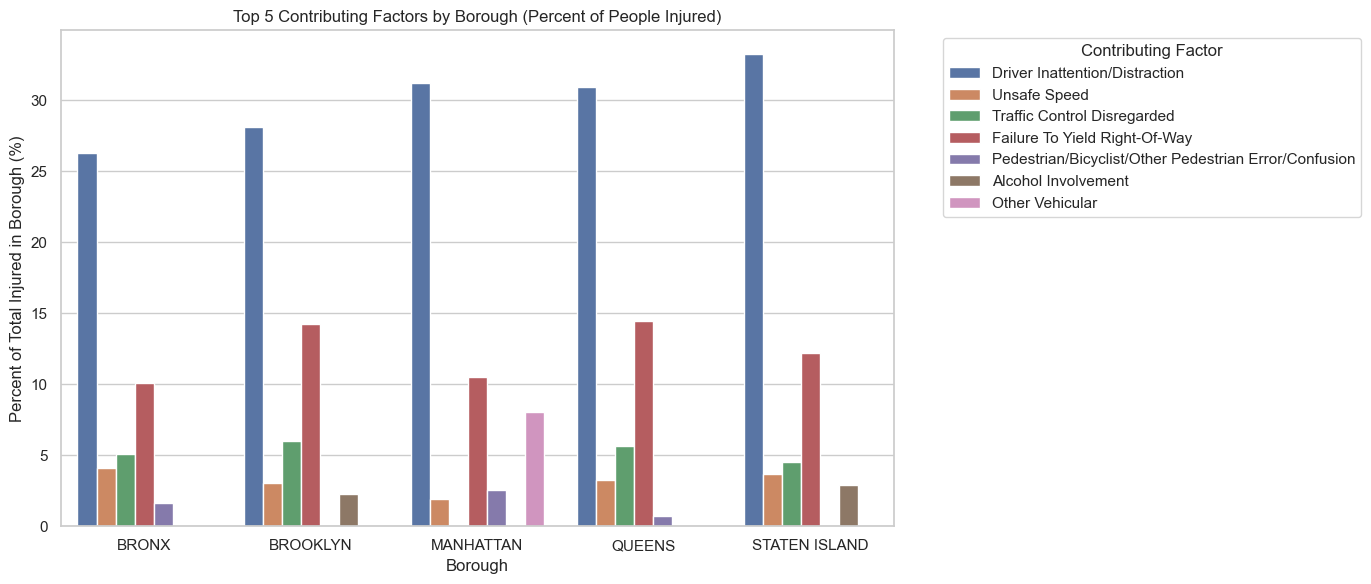

In [23]:
# Plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Bar plot
sns.barplot(data=top5_factors_by_borough, x='BOROUGH', y='PERCENT_INJURED', hue='FACTOR', dodge=True)

plt.title("Top 5 Contributing Factors by Borough (Percent of People Injured)")
plt.ylabel("Percent of Total Injured in Borough (%)")
plt.xlabel("Borough")
plt.legend(title="Contributing Factor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/top5_contributing_factors_for_injured_by_borough_in_borough.png', dpi=300)
plt.show()

In [24]:
# Total victims per borough
totals_per_borough['TOTAL_VICTIMS'] = (totals_per_borough['BOROUGH_TOTAL_KILLED'] + totals_per_borough['BOROUGH_TOTAL_INJURED'])

# Total of killed across all boroughs
grand_total_injured = totals_per_borough['BOROUGH_TOTAL_INJURED'].sum()

# Percent of killed per borough from total killed
totals_per_borough['PERCENT_OF_TOTAL_INJURED_BOROUGH'] = (totals_per_borough['BOROUGH_TOTAL_INJURED'] / totals_per_borough['TOTAL_VICTIMS'] * 100).round(3)
totals_per_borough['PERCENT_OF_TOTAL_INJURED_NYC'] = (totals_per_borough['BOROUGH_TOTAL_INJURED'] / grand_total_injured * 100).round(2)

# Final DataFrame
borough_injured_summary = totals_per_borough[['BOROUGH', 'TOTAL_VICTIMS', 'BOROUGH_TOTAL_INJURED', 'PERCENT_OF_TOTAL_INJURED_BOROUGH', 'PERCENT_OF_TOTAL_INJURED_NYC']]

borough_injured_summary

,BOROUGH,TOTAL_VICTIMS,BOROUGH_TOTAL_INJURED,PERCENT_OF_TOTAL_INJURED_BOROUGH,PERCENT_OF_TOTAL_INJURED_NYC
0,BRONX,42900,42737,99.620,16.92
1,BROOKLYN,75937,75666,99.643,29.95
2,MANHATTAN,42178,42013,99.609,16.63
3,QUEENS,79665,79376,99.637,31.42
4,STATEN ISLAND,12913,12853,99.535,5.09


Among all gathered records, Brooklyn had the highest percentage of collisions that resulted in injuries among all boroughs (the lowest fatality rate), while the highest number of injured persons occurred in Queens due to a greater number of total collisions.

In [25]:
totals_per_borough['TOTAL_VICTIMS']

0    42900
1    75937
2    42178
3    79665
4    12913
Name: TOTAL_VICTIMS, dtype: int64

### &nbsp;&nbsp;&nbsp;&nbsp;2.4 Collisions by severity and type of victims by borough for each year

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1 Date coverage in the dataset

In [26]:
# DATETIME to datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Year from DATETIME
df['YEAR'] = df['DATETIME'].dt.year

# Group by year and get min and max dates
date_range_per_year = df.groupby('YEAR')['DATETIME'].agg(['min', 'max']).reset_index()

date_range_per_year

,YEAR,min,max
0,2012,2012-07-01 00:05:00,2012-12-31 23:55:00
1,2013,2013-01-01 00:07:00,2013-12-31 21:46:00
2,2014,2014-01-02 12:15:00,2014-12-31 23:50:00
3,2015,2015-01-01 00:20:00,2015-12-31 23:58:00
4,2016,2016-01-01 00:01:00,2016-12-31 23:54:00
5,2017,2017-01-01 00:00:00,2017-12-30 18:40:00
6,2018,2018-01-01 09:00:00,2018-12-31 23:59:00
7,2019,2019-01-01 00:00:00,2019-11-26 23:40:00


An examination of the dataset’s date range reveals that some years do not have complete data coverage across all calendar dates. Specifically:
- The earliest recorded incident in 2012 occurs on July 1st, indicating partial data for that year (approximately half year was covered).
- Similarly, 2019 does not have data extending through December 31st, reflecting incomplete coverage at the end of the year.


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.2 Collisions by severity and type of victims over years in NYC

In [27]:
# Filter out partial years
df_full_years = df[~df['YEAR'].isin([2012, 2019])].copy()

# Create total victims column
df_full_years['TOTAL_VICTIMS'] = (df_full_years['NUMBER OF PERSONS INJURED'] + df_full_years['NUMBER OF PERSONS KILLED'])

# Group and aggregate
yearly_summary = df_full_years.groupby('YEAR').agg(
    TOTAL_VICTIMS=('TOTAL_VICTIMS', 'sum'),
    PEDESTRIANS_KILLED=('NUMBER OF PEDESTRIANS KILLED', 'sum'),
    PEDESTRIANS_INJURED=('NUMBER OF PEDESTRIANS INJURED', 'sum'),
    CYCLISTS_KILLED=('NUMBER OF CYCLIST KILLED', 'sum'),
    CYCLISTS_INJURED=('NUMBER OF CYCLIST INJURED', 'sum'),
    MOTORISTS_KILLED=('NUMBER OF MOTORIST KILLED', 'sum'),
    MOTORISTS_INJURED=('NUMBER OF MOTORIST INJURED', 'sum')
).reset_index()

yearly_summary

,YEAR,TOTAL_VICTIMS,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,CYCLISTS_KILLED,CYCLISTS_INJURED,MOTORISTS_KILLED,MOTORISTS_INJURED
0,2013,34619,105,7705,11,2623,67,24108
1,2014,35932,92,8002,16,2965,69,24788
2,2015,33806,83,6648,14,3138,51,23872
3,2016,43887,109,8490,10,3502,58,31718
4,2017,44128,93,8024,20,3540,76,32375
5,2018,49068,92,8919,10,3577,80,36390


In [28]:
yearly_summary.columns

Index(['YEAR', 'TOTAL_VICTIMS', 'PEDESTRIANS_KILLED', 'PEDESTRIANS_INJURED',
       'CYCLISTS_KILLED', 'CYCLISTS_INJURED', 'MOTORISTS_KILLED',
       'MOTORISTS_INJURED'],
      dtype='object')

In [29]:
# Percentages
yearly_summary['PERCENT_PEDESTRIANS_KILLED'] = (yearly_summary['PEDESTRIANS_KILLED'] / yearly_summary['TOTAL_VICTIMS'] * 100).round(2)
yearly_summary['PERCENT_PEDESTRIANS_INJURED'] = (yearly_summary['PEDESTRIANS_INJURED'] / yearly_summary['TOTAL_VICTIMS'] * 100).round(2)

yearly_summary['PERCENT_CYCLISTS_KILLED'] = (yearly_summary['CYCLISTS_KILLED'] / yearly_summary['TOTAL_VICTIMS'] * 100).round(2)
yearly_summary['PERCENT_CYCLISTS_INJURED'] = (yearly_summary['CYCLISTS_INJURED'] / yearly_summary['TOTAL_VICTIMS'] * 100).round(2)

yearly_summary['PERCENT_MOTORISTS_KILLED'] = (yearly_summary['MOTORISTS_KILLED'] / yearly_summary['TOTAL_VICTIMS'] * 100).round(2)
yearly_summary['PERCENT_MOTORISTS_INJURED'] = (yearly_summary['MOTORISTS_INJURED'] / yearly_summary['TOTAL_VICTIMS'] * 100).round(2)

yearly_summary

,YEAR,TOTAL_VICTIMS,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,CYCLISTS_KILLED,CYCLISTS_INJURED,MOTORISTS_KILLED,MOTORISTS_INJURED,PERCENT_PEDESTRIANS_KILLED,PERCENT_PEDESTRIANS_INJURED,PERCENT_CYCLISTS_KILLED,PERCENT_CYCLISTS_INJURED,PERCENT_MOTORISTS_KILLED,PERCENT_MOTORISTS_INJURED
0,2013,34619,105,7705,11,2623,67,24108,0.30,22.26,0.03,7.58,0.19,69.64
1,2014,35932,92,8002,16,2965,69,24788,0.26,22.27,0.04,8.25,0.19,68.99
2,2015,33806,83,6648,14,3138,51,23872,0.25,19.67,0.04,9.28,0.15,70.61
3,2016,43887,109,8490,10,3502,58,31718,0.25,19.35,0.02,7.98,0.13,72.27
4,2017,44128,93,8024,20,3540,76,32375,0.21,18.18,0.05,8.02,0.17,73.37
5,2018,49068,92,8919,10,3577,80,36390,0.19,18.18,0.02,7.29,0.16,74.16


Injured and killed in each year:

In [30]:
# Group by year and get totals
yearly_totals = df[~df['DATETIME'].dt.year.isin([2012, 2019])].copy()
yearly_totals['YEAR'] = yearly_totals['DATETIME'].dt.year

grouped_years = yearly_totals.groupby('YEAR').agg({'NUMBER OF PERSONS KILLED': 'sum', 'NUMBER OF PERSONS INJURED': 'sum'}).reset_index()

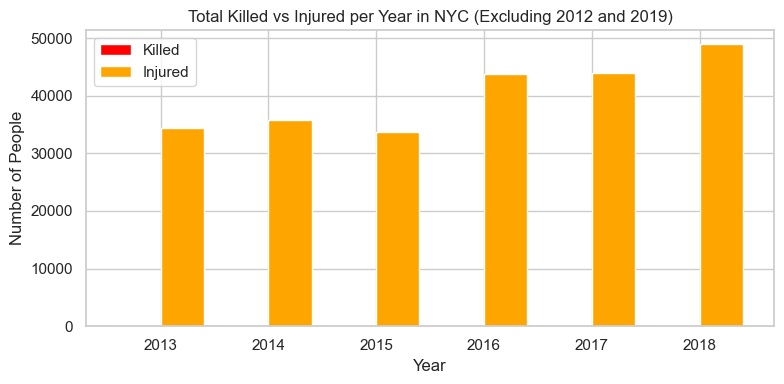

In [31]:
# Bar plot
bar_width = 0.4
x = grouped_years['YEAR']
x_indexes = range(len(x))

plt.figure(figsize=(8, 4))
plt.bar([i - bar_width/2 for i in x_indexes], grouped_years['NUMBER OF PERSONS KILLED'], width=bar_width, label='Killed', color='red')
plt.bar([i + bar_width/2 for i in x_indexes], grouped_years['NUMBER OF PERSONS INJURED'], width=bar_width, label='Injured', color='orange')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Total Killed vs Injured per Year in NYC (Excluding 2012 and 2019)')
plt.xticks(ticks=x_indexes, labels=x)
plt.legend()
plt.tight_layout()
plt.savefig('plots/killed_vs_injured_per_year_NYC.png', dpi=300)
plt.show()

In [32]:
# Calculate non-injury collisions per year
yearly_totals['NO_INJURY_OR_FATALITY'] = (
    (yearly_totals['NUMBER OF PERSONS INJURED'] == 0) & 
    (yearly_totals['NUMBER OF PERSONS KILLED'] == 0)
)

# Count number of such rows per year
no_injury_counts = yearly_totals.groupby('YEAR')['NO_INJURY_OR_FATALITY'].sum().reset_index(name='NO_INJURY_COLLISIONS')

# Merge with grouped_years to include the count of no-injury collisions
grouped_years = grouped_years.merge(no_injury_counts, on='YEAR')

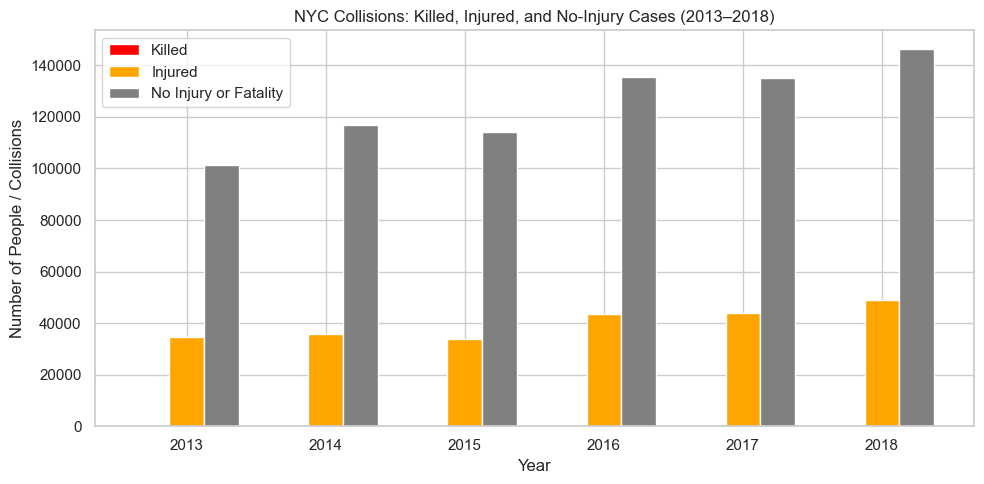

In [33]:
# Update x and x_indexes
x = grouped_years['YEAR']
x_indexes = range(len(x))

# Bar width and positions
bar_width = 0.25

plt.figure(figsize=(10, 5))
plt.bar([i - bar_width for i in x_indexes], grouped_years['NUMBER OF PERSONS KILLED'], 
        width=bar_width, label='Killed', color='red')

plt.bar(x_indexes, grouped_years['NUMBER OF PERSONS INJURED'], 
        width=bar_width, label='Injured', color='orange')

plt.bar([i + bar_width for i in x_indexes], grouped_years['NO_INJURY_COLLISIONS'], 
        width=bar_width, label='No Injury or Fatality', color='gray')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of People / Collisions')
plt.title('NYC Collisions: Killed, Injured, and No-Injury Cases (2013–2018)')
plt.xticks(ticks=x_indexes, labels=x)
plt.legend()
plt.tight_layout()
plt.savefig('plots/killed_injured_noinjury_per_year_NYC.png', dpi=300)
plt.show()

Killed (pedestrians, cyclist and motorist) in each year:

In [34]:
# Add 'YEAR' column and filter out incomplete years
df_years = df.copy()
df_years['YEAR'] = df_years['DATETIME'].dt.year
df_full = df_years[~df_years['YEAR'].isin([2012, 2019])]

# Group and aggregate killed by category per year
killed_by_type = df_full.groupby('YEAR').agg({'NUMBER OF PEDESTRIANS KILLED': 'sum', 'NUMBER OF CYCLIST KILLED': 'sum', 'NUMBER OF MOTORIST KILLED': 'sum'}).reset_index()

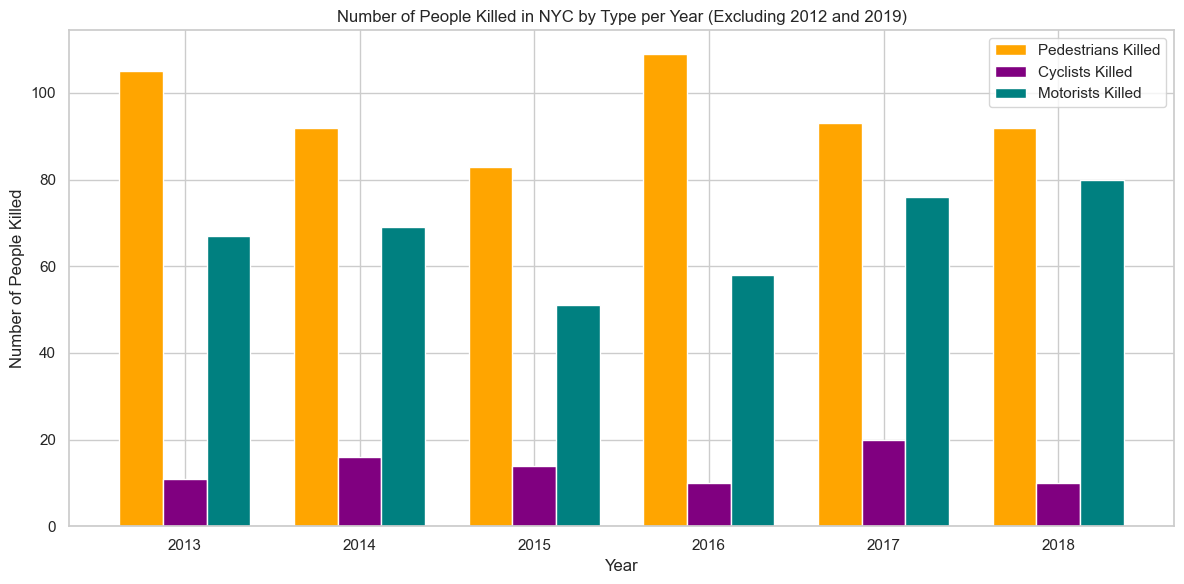

In [35]:
# Plot
bar_width = 0.25
x = killed_by_type['YEAR']
x_indexes = range(len(x))

plt.figure(figsize=(12, 6))

plt.bar([i - bar_width for i in x_indexes], killed_by_type['NUMBER OF PEDESTRIANS KILLED'],
        width=bar_width, label='Pedestrians Killed', color='orange')

plt.bar(x_indexes, killed_by_type['NUMBER OF CYCLIST KILLED'],
        width=bar_width, label='Cyclists Killed', color='purple')

plt.bar([i + bar_width for i in x_indexes], killed_by_type['NUMBER OF MOTORIST KILLED'],
        width=bar_width, label='Motorists Killed', color='teal')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of People Killed')
plt.title('Number of People Killed in NYC by Type per Year (Excluding 2012 and 2019)')
plt.xticks(ticks=x_indexes, labels=x)
plt.legend()
plt.tight_layout()
plt.savefig('plots/killed_per_year_pedestrians_cyclist_motorist_NYC.png', dpi=300)
plt.show()

Injured (pedestrians, cyclist and motorist) in each year:

In [36]:
# Ensure 'YEAR' column exists and filter out incomplete years
df_years = df.copy()
df_years['YEAR'] = df_years['DATETIME'].dt.year
df_full = df_years[~df_years['YEAR'].isin([2012, 2019])]

# Group and aggregate injured by category per year
injured_by_type = df_full.groupby('YEAR').agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF MOTORIST INJURED': 'sum'
}).reset_index()

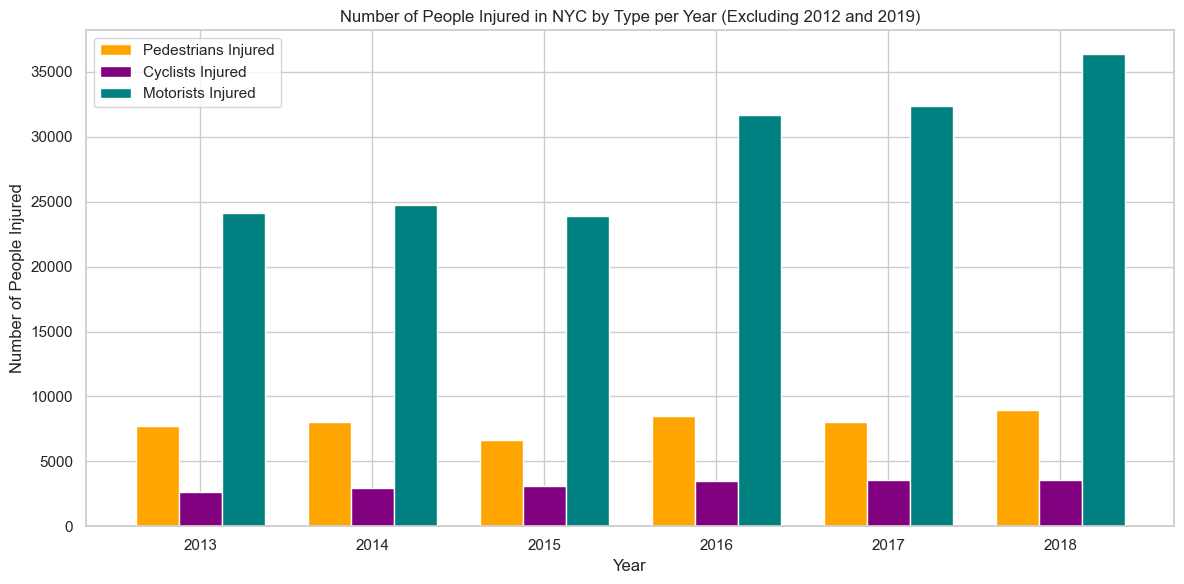

In [37]:
# Plot
bar_width = 0.25
x = injured_by_type['YEAR']
x_indexes = range(len(x))

plt.figure(figsize=(12, 6))

# Plot each category
plt.bar([i - bar_width for i in x_indexes], injured_by_type['NUMBER OF PEDESTRIANS INJURED'],  width=bar_width, label='Pedestrians Injured', color='orange')

plt.bar(x_indexes, injured_by_type['NUMBER OF CYCLIST INJURED'], width=bar_width, label='Cyclists Injured', color='purple')

plt.bar([i + bar_width for i in x_indexes], injured_by_type['NUMBER OF MOTORIST INJURED'], width=bar_width, label='Motorists Injured', color='teal')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of People Injured')
plt.title('Number of People Injured in NYC by Type per Year (Excluding 2012 and 2019)')
plt.xticks(ticks=x_indexes, labels=x)
plt.legend()
plt.tight_layout()
plt.savefig('plots/injured_per_year_pedestrians_cyclist_motorist_NYC.png', dpi=300)
plt.show()

Total victims (pedestrians, cyclist and motorist) in each year:

In [38]:
victims_by_type = df_full.groupby('YEAR').agg({
    'NUMBER OF PEDESTRIANS KILLED': 'sum',
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF CYCLIST KILLED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF MOTORIST KILLED': 'sum',
    'NUMBER OF MOTORIST INJURED': 'sum',
}).reset_index()

In [39]:
victims_by_type['PEDESTRIANS_TOTAL_VICTIMS'] = (victims_by_type['NUMBER OF PEDESTRIANS KILLED'] + victims_by_type['NUMBER OF PEDESTRIANS INJURED'])

victims_by_type['CYCLIST_TOTAL_VICTIMS'] = (victims_by_type['NUMBER OF CYCLIST KILLED'] + victims_by_type['NUMBER OF CYCLIST INJURED'])

victims_by_type['MOTORIST_TOTAL_VICTIMS'] = (victims_by_type['NUMBER OF MOTORIST KILLED'] + victims_by_type['NUMBER OF MOTORIST INJURED'])

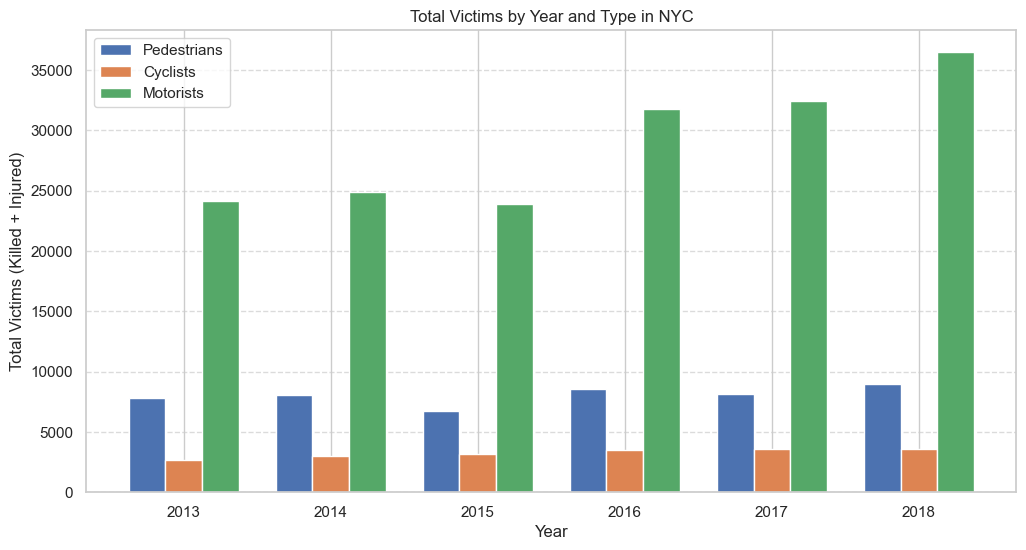

In [40]:
years = victims_by_type['YEAR']
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Positions of the bars on the x-axis
x = np.arange(len(years))

# Bars for each category
bar1 = ax.bar(x - width, victims_by_type['PEDESTRIANS_TOTAL_VICTIMS'], width, label='Pedestrians')
bar2 = ax.bar(x, victims_by_type['CYCLIST_TOTAL_VICTIMS'], width, label='Cyclists')
bar3 = ax.bar(x + width, victims_by_type['MOTORIST_TOTAL_VICTIMS'], width, label='Motorists')

ax.set_xlabel('Year')
ax.set_ylabel('Total Victims (Killed + Injured)')
ax.set_title('Total Victims by Year and Type in NYC')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('plots/total_victims_per_year_pedestrians_cyclist_motorist_NYC.png', dpi=300)
plt.show()

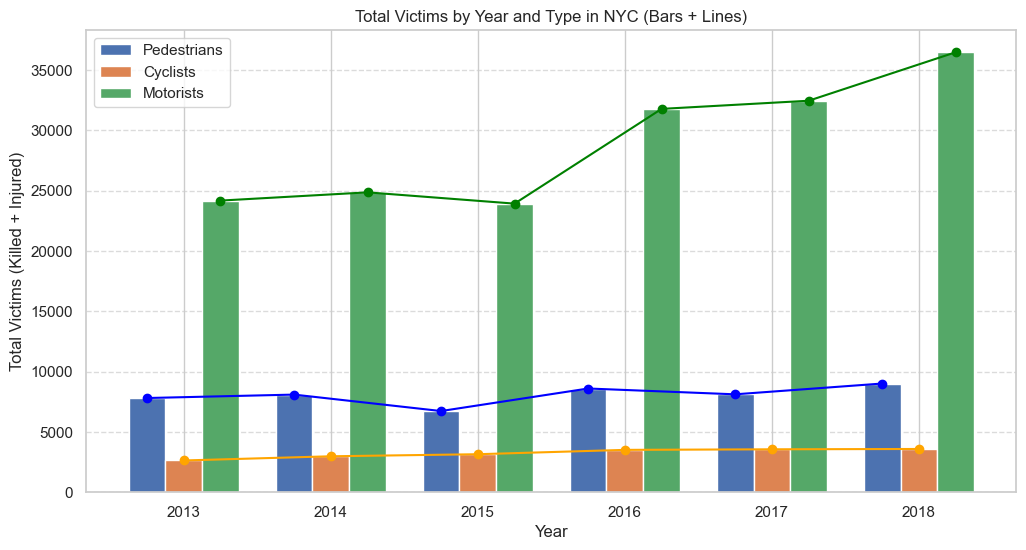

In [41]:
years = victims_by_type['YEAR']
width = 0.25
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(12, 6))

# Bars
bar1 = ax.bar(x - width, victims_by_type['PEDESTRIANS_TOTAL_VICTIMS'], width, label='Pedestrians')
bar2 = ax.bar(x, victims_by_type['CYCLIST_TOTAL_VICTIMS'], width, label='Cyclists')
bar3 = ax.bar(x + width, victims_by_type['MOTORIST_TOTAL_VICTIMS'], width, label='Motorists')

# Lines connecting the tops of bars
ax.plot(x - width, victims_by_type['PEDESTRIANS_TOTAL_VICTIMS'], color='blue', marker='o')
ax.plot(x, victims_by_type['CYCLIST_TOTAL_VICTIMS'], color='orange', marker='o')
ax.plot(x + width, victims_by_type['MOTORIST_TOTAL_VICTIMS'], color='green', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Total Victims (Killed + Injured)')
ax.set_title('Total Victims by Year and Type in NYC (Bars + Lines)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('plots/total_victims_per_year_pedestrians_cyclist_motorist_NYC_2.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.3 Collisions by severity over months in borougs

Persons killed by months in each borough:

In [42]:
# Year for filtering
df['YEAR'] = df['DATETIME'].dt.year

# Filter out years 2012 and 2019
df_filtered = df[~df['YEAR'].isin([2012, 2019])].copy()

# Extract month name 
df_filtered['MONTH'] = df_filtered['DATETIME'].dt.month_name()

# Group by BOROUGH and MONTH, sum NUMBER OF PERSONS KILLED
monthly_killed_by_borough = (df_filtered.groupby(['BOROUGH', 'MONTH'])['NUMBER OF PERSONS KILLED'].sum().reset_index())

# Ensure MONTH is categorical and ordered
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_killed_by_borough['MONTH'] = pd.Categorical(monthly_killed_by_borough['MONTH'], categories=month_order, ordered=True)

# Sort for plotting
monthly_killed_by_borough = monthly_killed_by_borough.sort_values(['BOROUGH', 'MONTH']).reset_index(drop=True)

monthly_killed_by_borough.head()

,BOROUGH,MONTH,NUMBER OF PERSONS KILLED
0,BRONX,January,14
1,BRONX,February,7
2,BRONX,March,16
3,BRONX,April,20
4,BRONX,May,12


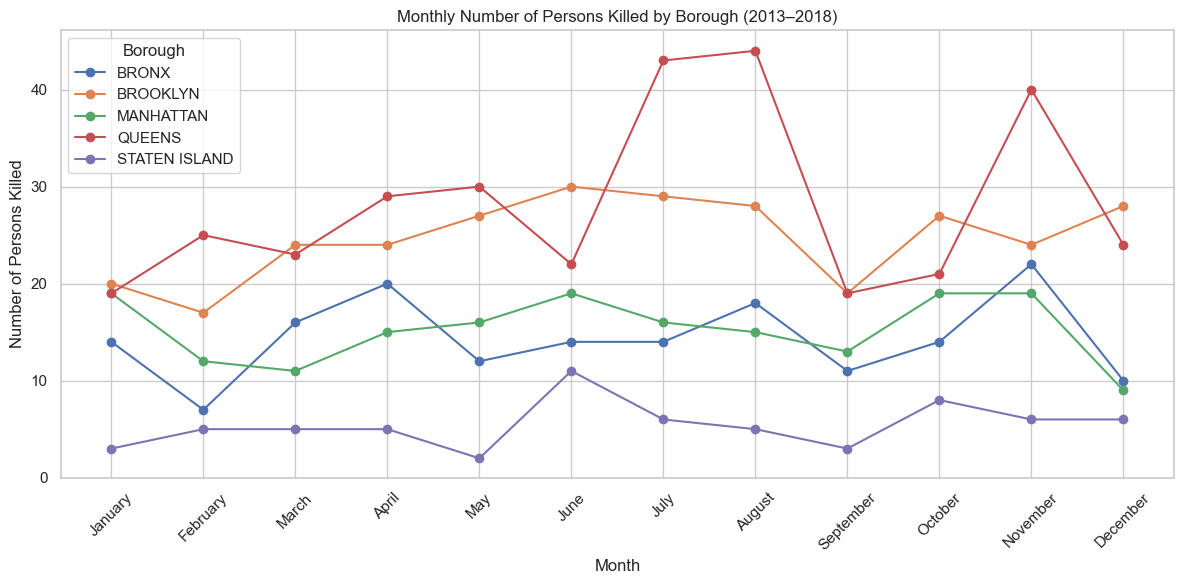

In [43]:
# Plot
plt.figure(figsize=(12, 6))
for borough in monthly_killed_by_borough['BOROUGH'].unique():
    borough_data = monthly_killed_by_borough[monthly_killed_by_borough['BOROUGH'] == borough]
    plt.plot(borough_data['MONTH'], borough_data['NUMBER OF PERSONS KILLED'], marker='o', label=borough)

plt.title('Monthly Number of Persons Killed by Borough (2013–2018)')
plt.xlabel('Month')
plt.ylabel('Number of Persons Killed')
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.legend(title='Borough')
plt.tight_layout()
plt.savefig('plots/monthly_number_of_killed_by_borough_filtered.png', dpi=300)
plt.show()

Persons injured by months in each borough:

In [44]:
# Extract year and month name first
df['YEAR'] = df['DATETIME'].dt.year
df['MONTH'] = df['DATETIME'].dt.month_name()

# Filter out 2012 and 2019
df_filtered = df[~df['YEAR'].isin([2012, 2019])].copy()

# Group by BOROUGH and MONTH, then sum NUMBER OF PERSONS INJURED
monthly_injured_by_borough = (df.groupby(['BOROUGH', 'MONTH'])['NUMBER OF PERSONS INJURED'].sum().reset_index())

monthly_injured_by_borough['MONTH'] = pd.Categorical(monthly_injured_by_borough['MONTH'], categories=month_order, ordered=True)

# Sort by borough and month
monthly_injured_by_borough = monthly_injured_by_borough.sort_values(['BOROUGH', 'MONTH']).reset_index(drop=True)

monthly_injured_by_borough.head()

,BOROUGH,MONTH,NUMBER OF PERSONS INJURED
0,BRONX,January,3202
1,BRONX,February,3192
2,BRONX,March,3947
3,BRONX,April,4497
4,BRONX,May,4932


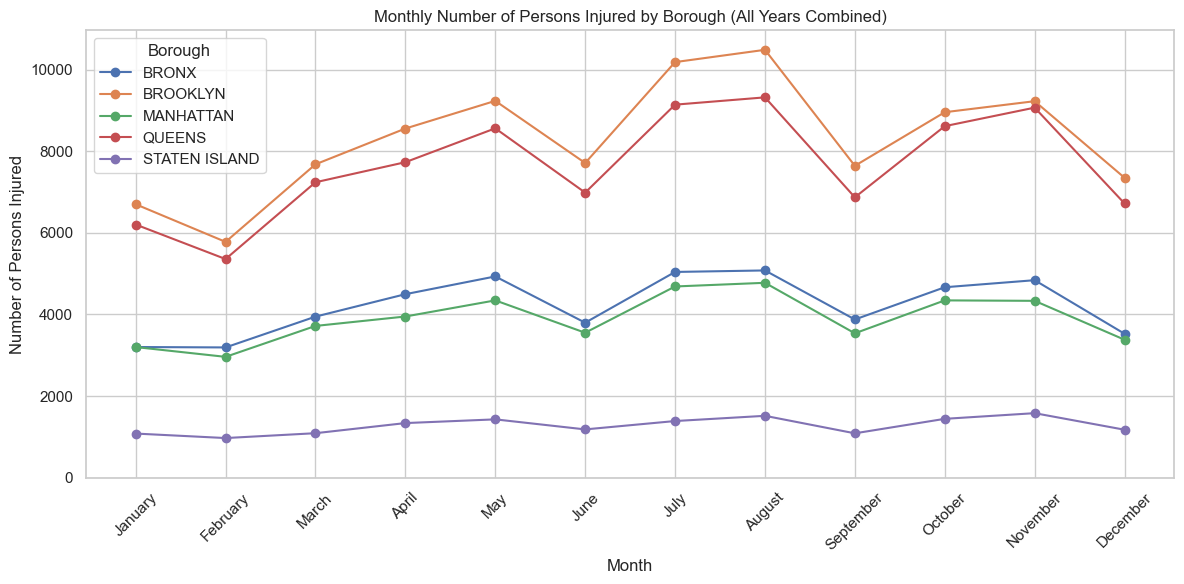

In [45]:
plt.figure(figsize=(12, 6))

for borough in monthly_injured_by_borough['BOROUGH'].unique():
    borough_data = monthly_injured_by_borough[monthly_injured_by_borough['BOROUGH'] == borough]
    plt.plot(borough_data['MONTH'], borough_data['NUMBER OF PERSONS INJURED'], marker='o', label=borough)

plt.title('Monthly Number of Persons Injured by Borough (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Persons Injured')
plt.xticks(rotation=45)
plt.ylim(bottom=0)  # Force y-axis start at 0
plt.legend(title='Borough')
plt.tight_layout()
plt.savefig('plots/monthly_number_of_injured_by_borough.png', dpi=300)
plt.show()

All victims (persons injured and killed) by months in each borough:

In [46]:
# Group by BOROUGH and MONTH, then sum both injured and killed
monthly_victims_by_borough = (df.groupby(['BOROUGH', 'MONTH'])[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum().reset_index())

# Create a total victims column
monthly_victims_by_borough['TOTAL_VICTIMS'] = (monthly_victims_by_borough['NUMBER OF PERSONS INJURED'] + monthly_victims_by_borough['NUMBER OF PERSONS KILLED'])

monthly_victims_by_borough['MONTH'] = pd.Categorical( monthly_victims_by_borough['MONTH'], categories=month_order, ordered=True)

# Sort by borough and month
monthly_victims_by_borough = monthly_victims_by_borough.sort_values(['BOROUGH', 'MONTH']).reset_index(drop=True)

monthly_victims_by_borough.head()

,BOROUGH,MONTH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,TOTAL_VICTIMS
0,BRONX,January,3202,16,3218
1,BRONX,February,3192,10,3202
2,BRONX,March,3947,18,3965
3,BRONX,April,4497,20,4517
4,BRONX,May,4932,14,4946


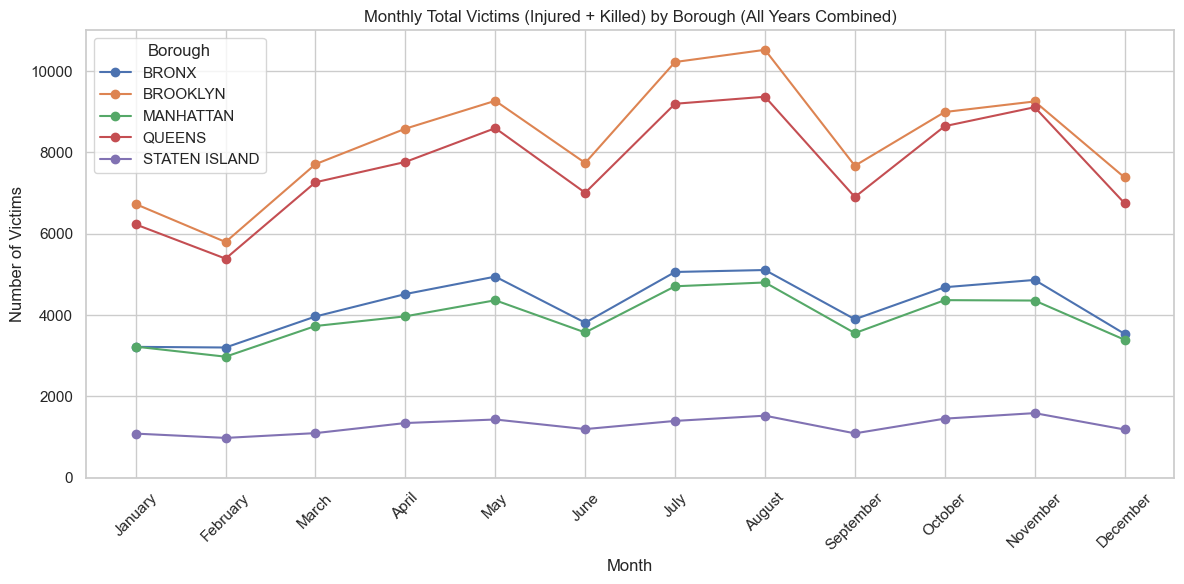

In [47]:
# Ensure integer counts for cleaner plotting
monthly_victims_by_borough['TOTAL_VICTIMS'] = monthly_victims_by_borough['TOTAL_VICTIMS'].astype(int)

plt.figure(figsize=(12, 6))

for borough in monthly_victims_by_borough['BOROUGH'].unique():
    borough_data = monthly_victims_by_borough[monthly_victims_by_borough['BOROUGH'] == borough]
    plt.plot(borough_data['MONTH'], borough_data['TOTAL_VICTIMS'], marker='o', label=borough)

plt.title('Monthly Total Victims (Injured + Killed) by Borough (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.ylim(bottom=0)  # Force y-axis start at 0
plt.legend(title='Borough')
plt.tight_layout()
plt.savefig('plots/monthly_number_of_victims_by_borough.png', dpi=300)
plt.show()

### &nbsp;&nbsp;&nbsp;&nbsp;2.5 Top 3 contributing factors per years (2013-2018) in all boroughs

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5.1 Top 3 Contributing factors for per years (2013-2018) in NYC

In [48]:
# Year from DATETIME
df['YEAR'] = df['DATETIME'].dt.year

# Exclude years 2012 and 2019
df_filtered = df[~df['YEAR'].isin([2012, 2019])]

# Select contributing factor columns
factor_cols = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5',
]

df_factors = df_filtered[['BOROUGH', 'YEAR'] + factor_cols]

# Melt to long format
df_factors_long = df_factors.melt(id_vars=['BOROUGH', 'YEAR'], value_vars=factor_cols,  var_name='FACTOR_COL', value_name='FACTOR')

# Filter out missing, empty, and 'Unspecified' factors
df_factors_long = df_factors_long[
    (df_factors_long['FACTOR'].notna()) &
    (df_factors_long['FACTOR'] != '') &
    (df_factors_long['FACTOR'] != 'Unspecified')
]

In [49]:
# Group by BOROUGH, YEAR, FACTOR and count occurrences
factor_counts = ( df_factors_long.groupby(['BOROUGH', 'YEAR', 'FACTOR']).size().reset_index(name='COUNT'))

In [50]:
top_3_factors_per_borough_year = (factor_counts.sort_values(['BOROUGH', 'YEAR', 'COUNT'], ascending=[True, True, False]).groupby(['BOROUGH', 'YEAR'])
    .head(3).reset_index(drop=True))

In [51]:
# Total factors per borough-year to get percentages
total_factors_per_borough_year = (factor_counts.groupby(['BOROUGH', 'YEAR'])['COUNT'].sum().reset_index(name='TOTAL_COUNT'))

# Merge total counts to top 3 factors
top_3_factors_per_borough_year = top_3_factors_per_borough_year.merge(total_factors_per_borough_year, on=['BOROUGH', 'YEAR'])

# Percentage of each factor within borough-year
top_3_factors_per_borough_year['PERCENT'] = ( (top_3_factors_per_borough_year['COUNT'] / top_3_factors_per_borough_year['TOTAL_COUNT']) * 100).round(2)

In [52]:
top_3_factors_per_borough_year.head(10)

,BOROUGH,YEAR,FACTOR,COUNT,TOTAL_COUNT,PERCENT
0,BRONX,2013,Driver Inattention/Distraction,2261,7762,29.13
1,BRONX,2013,Fatigued/Drowsy,721,7762,9.29
2,BRONX,2013,Failure to Yield Right-of-Way,699,7762,9.01
3,BRONX,2014,Driver Inattention/Distraction,2429,9197,26.41
4,BRONX,2014,Other Vehicular,1088,9197,11.83
5,BRONX,2014,Fatigued/Drowsy,826,9197,8.98
6,BRONX,2015,Driver Inattention/Distraction,3692,10888,33.91
7,BRONX,2015,Other Vehicular,1376,10888,12.64
8,BRONX,2015,Fatigued/Drowsy,947,10888,8.70
9,BRONX,2016,Driver Inattention/Distraction,5986,18792,31.85


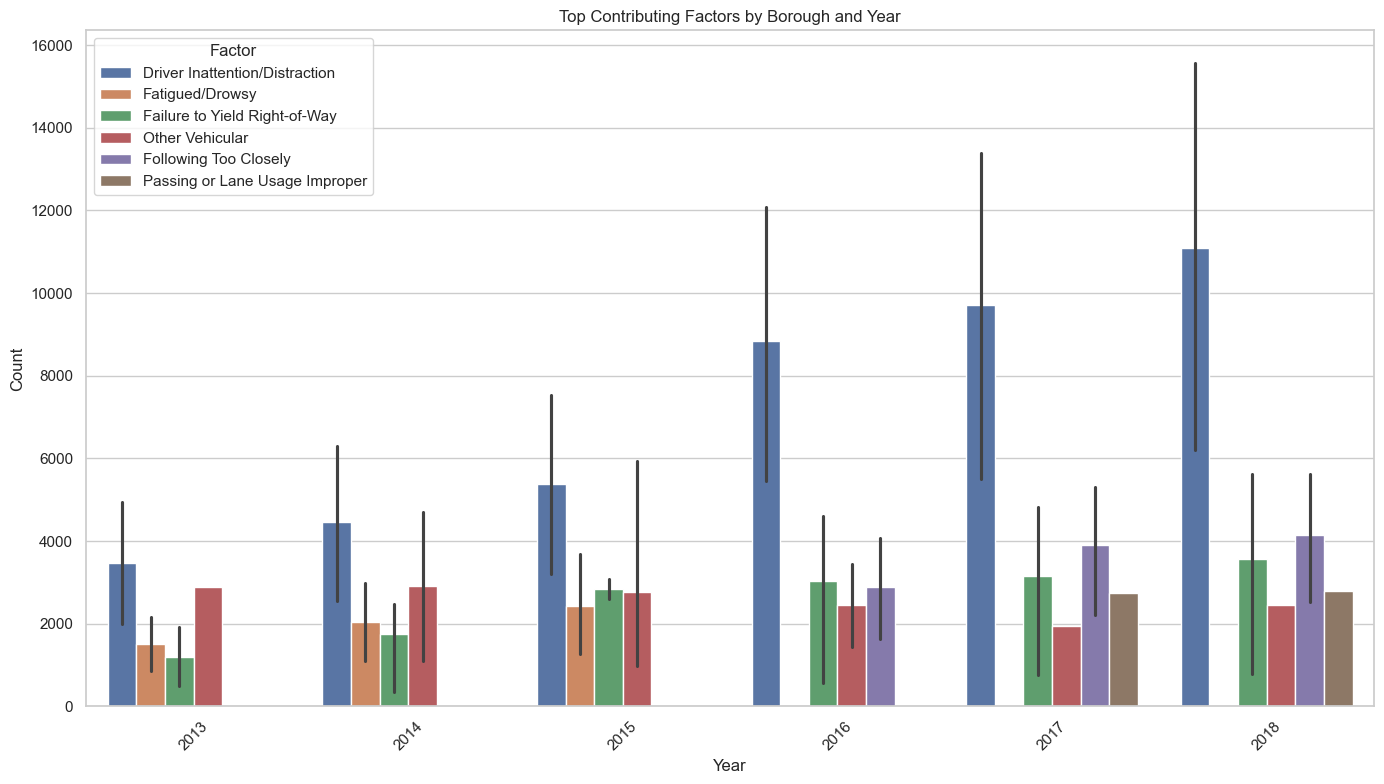

In [53]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_3_factors_per_borough_year, x='YEAR', y='COUNT', hue='FACTOR')

plt.title('Top Contributing Factors by Borough and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Factor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/top3_factors_by_borough_per_year.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5.2 Top 3 Contributing factors for all victims per years (2013-2018) in all boroughs

In [54]:
# Filter factors for killed persons
df_factors_filtered = df_factors_long.copy()

df_factors_filtered = df_factors_filtered[~df_factors_filtered['YEAR'].isin([2012, 2019])]

# Exclude years 2012 and 2019
df_factors_filtered = df_factors_filtered[~df_factors_filtered['YEAR'].isin([2012, 2019])]

# Group by YEAR, BOROUGH, FACTOR and count occurrences
top_factors_by_year_borough = (df_factors_filtered.groupby(['YEAR', 'BOROUGH', 'FACTOR']).size().reset_index(name='COUNT'))

# For each YEAR and BOROUGH, top 3 factors by count descending
top_3_per_year_borough = ( top_factors_by_year_borough.sort_values(['YEAR', 'BOROUGH', 'COUNT'], ascending=[True, True, False]) .groupby(['YEAR', 'BOROUGH']).head(3))

# Total factors per YEAR and BOROUGH (for percentages)
total_factors_per_year_borough = (top_factors_by_year_borough.groupby(['YEAR', 'BOROUGH'])['COUNT'] .sum().reset_index(name='TOTAL_IN_GROUP'))

# Total count to top 3 and its percentage
top_3_per_year_borough = top_3_per_year_borough.merge(total_factors_per_year_borough, on=['YEAR', 'BOROUGH'])
top_3_per_year_borough['PERCENT'] = ((top_3_per_year_borough['COUNT'] / top_3_per_year_borough['TOTAL_IN_GROUP']) * 100).round(2)

In [55]:
top_3_per_year_borough.head()

,YEAR,BOROUGH,FACTOR,COUNT,TOTAL_IN_GROUP,PERCENT
0,2013,BRONX,Driver Inattention/Distraction,2261,7762,29.13
1,2013,BRONX,Fatigued/Drowsy,721,7762,9.29
2,2013,BRONX,Failure to Yield Right-of-Way,699,7762,9.01
3,2013,BROOKLYN,Driver Inattention/Distraction,3616,15447,23.41
4,2013,BROOKLYN,Fatigued/Drowsy,1863,15447,12.06


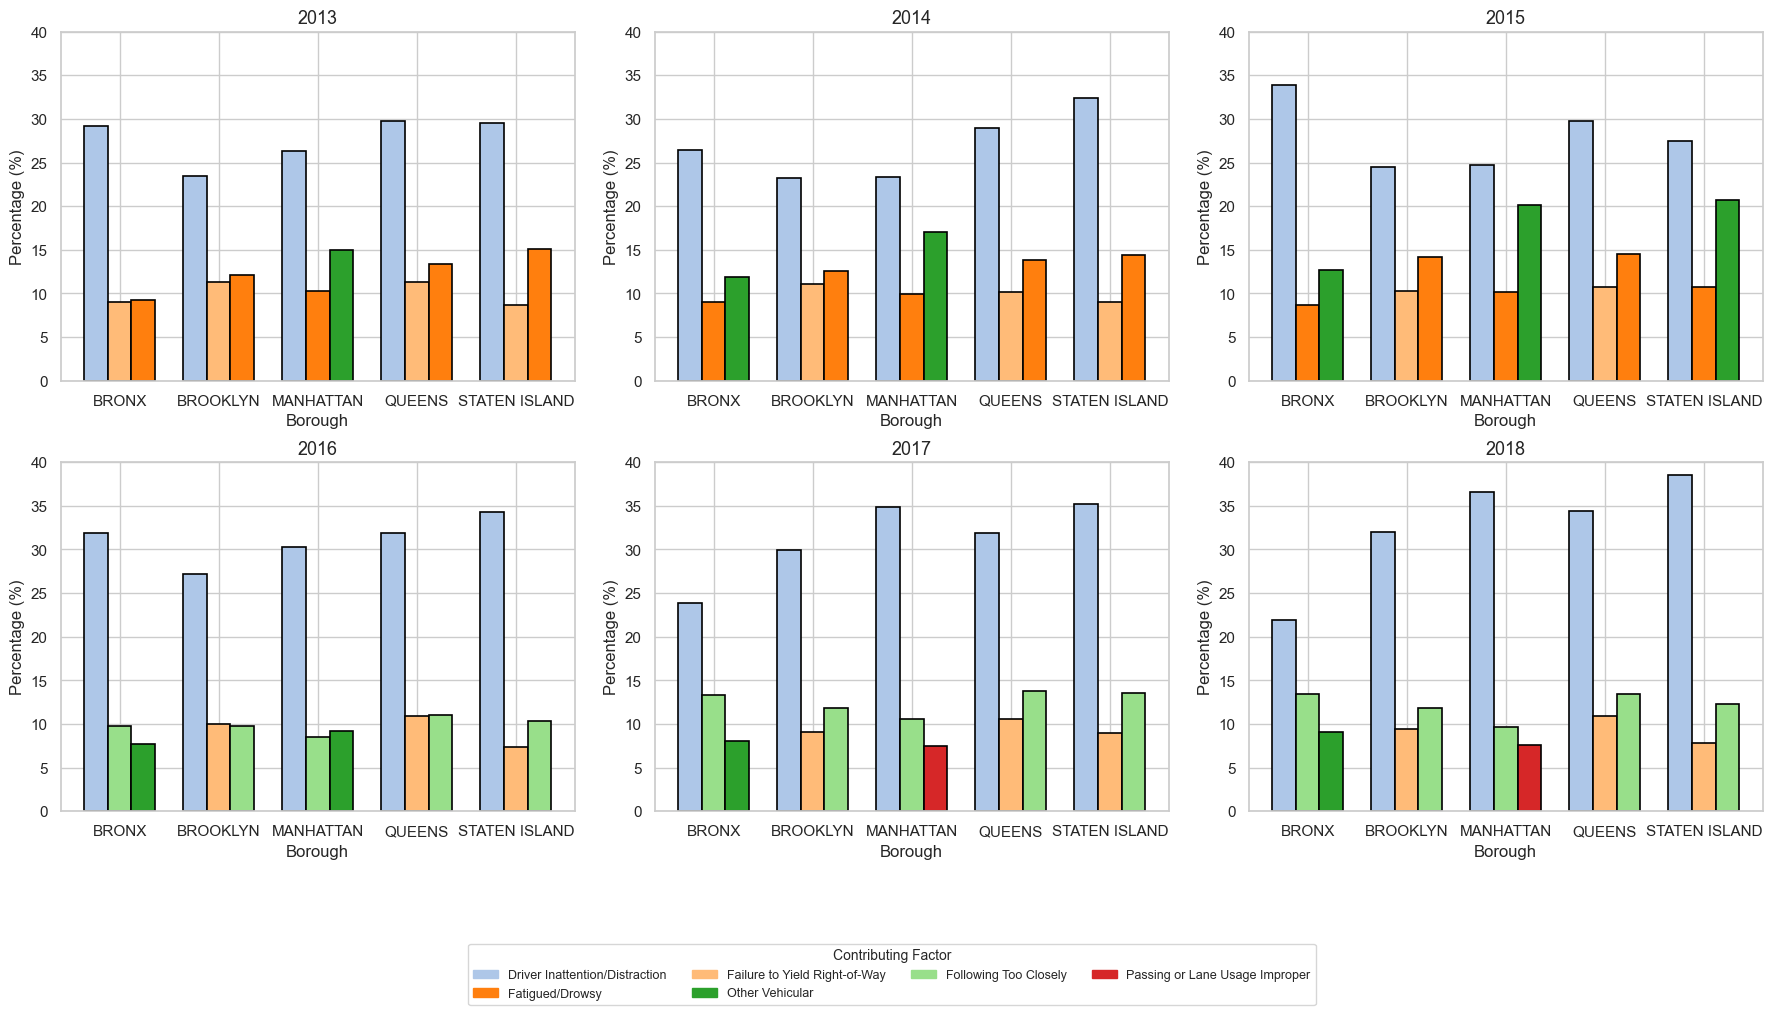

In [56]:
top_3_complete = top_3_per_year_borough.copy()

years = sorted(top_3_complete['YEAR'].unique())
boroughs = sorted(top_3_complete['BOROUGH'].unique())
factors = top_3_complete['FACTOR'].unique()

# Factor color mapping
palette = sns.color_palette('tab20', n_colors=12)
shift = 1
rotated_palette = palette[shift:] + palette[:shift]
factor_color_map = dict(zip(factors, rotated_palette))

n_cols = 3
n_rows = -(-len(years) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), squeeze=False)

bar_width = 0.25  # width of each bar within borough
space_between_boroughs = 0.3  # space between borough groups

for i, year in enumerate(years):
    ax = axes[i // n_cols, i % n_cols]
    data_year = top_3_complete[top_3_complete['YEAR'] == year]

    # Positioning bars manually
    # For each borough, position its 3 bars tightly, then add space before next borough
    positions = []
    heights = []
    colors = []
    labels = []  # borough labels, centered under group of bars

    current_pos = 0
    tick_positions = []
    tick_labels = []

    for borough in boroughs:
        borough_data = data_year[data_year['BOROUGH'] == borough].sort_values('FACTOR')
        n_factors = len(borough_data)
        
        # Positions for this borough's bars (3 bars tightly packed)
        borough_positions = np.arange(current_pos, current_pos + bar_width * n_factors, bar_width)
        positions.extend(borough_positions)
        heights.extend(borough_data['PERCENT'].tolist())
        colors.extend([factor_color_map[f] for f in borough_data['FACTOR']])
        
        # Add label position centered on borough bars
        tick_positions.append(current_pos + bar_width * (n_factors - 1) / 2)
        tick_labels.append(borough)
        
        # Move position for next borough (+ space_between_boroughs)
        current_pos = current_pos + bar_width * n_factors + space_between_boroughs

    # Draw bars manually
    bars = ax.bar(positions, heights, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)

    ax.set_title(f'{year}', fontsize=13)
    ax.set_xlabel('Borough')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 40)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)

    # Remove legend for individual axes
    ax.get_legend().remove() if ax.get_legend() else None

# Remove empty axes if any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# Create one shared legend
# Build handles for legend from factor colors
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=factor_color_map[f], label=f) for f in factors]

fig.legend(
    handles=legend_handles,
    title='Contributing Factor',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=4,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.subplots_adjust(bottom=0.18)
plt.savefig('plots/top3_factors_for_victims_in_borough_per_year.png', dpi=300, bbox_inches='tight')
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5.2 Top 3 Contributing factors for killed per years (2013-2018) in all boroughs

In [57]:
df_factors_long.columns

Index(['BOROUGH', 'YEAR', 'FACTOR_COL', 'FACTOR'], dtype='object')

In [58]:
df_factors = df_filtered[['BOROUGH', 'YEAR', 'NUMBER OF PERSONS KILLED'] + factor_cols]

# Melt to long format
df_factors_long = df_factors.melt(id_vars=['BOROUGH', 'YEAR', 'NUMBER OF PERSONS KILLED'], value_vars=factor_cols, var_name='FACTOR_COL', value_name='FACTOR')

# Filter out missing, empty, and 'Unspecified' factors
df_factors_long = df_factors_long[
    (df_factors_long['FACTOR'].notna()) &
    (df_factors_long['FACTOR'] != '') &
    (df_factors_long['FACTOR'] != 'Unspecified')
]

# Filter dataset (exclude years and unspecified)
df_killed_factors = df_factors_long.copy()
df_killed_factors = df_killed_factors[(~df_killed_factors['YEAR'].isin([2012, 2019])) & (df_killed_factors['FACTOR'] != 'Unspecified')]

# Group by YEAR, BOROUGH, FACTOR and sum NUMBER OF PERSONS KILLED
killed_by_factor = ( df_killed_factors.groupby(['YEAR', 'BOROUGH', 'FACTOR'])['NUMBER OF PERSONS KILLED'].sum().reset_index(name='KILLED'))

# Get top 3 factors by number of people killed per YEAR & BOROUGH
top_3_killed_factors = (killed_by_factor.sort_values(['YEAR', 'BOROUGH', 'KILLED'], ascending=[True, True, False]).groupby(['YEAR', 'BOROUGH']).head(3))

# Total number of persons killed per YEAR & BOROUGH
total_killed_per_group = ( df_killed_factors.groupby(['YEAR', 'BOROUGH'])['NUMBER OF PERSONS KILLED'].sum().reset_index(name='TOTAL_KILLED'))

# Merge and compute percentage
top_3_killed_factors = top_3_killed_factors.merge(total_killed_per_group, on=['YEAR', 'BOROUGH'])
top_3_killed_factors['PERCENT'] = ((top_3_killed_factors['KILLED'] / top_3_killed_factors['TOTAL_KILLED']) * 100).round(2)

In [59]:
top_3_killed_factors.head()

,YEAR,BOROUGH,FACTOR,KILLED,TOTAL_KILLED,PERCENT
0,2013,BRONX,Traffic Control Disregarded,3,11,27.27
1,2013,BRONX,Following Too Closely,2,11,18.18
2,2013,BRONX,Passenger Distraction,2,11,18.18
3,2013,BROOKLYN,Traffic Control Disregarded,15,32,46.88
4,2013,BROOKLYN,Failure to Yield Right-of-Way,4,32,12.50


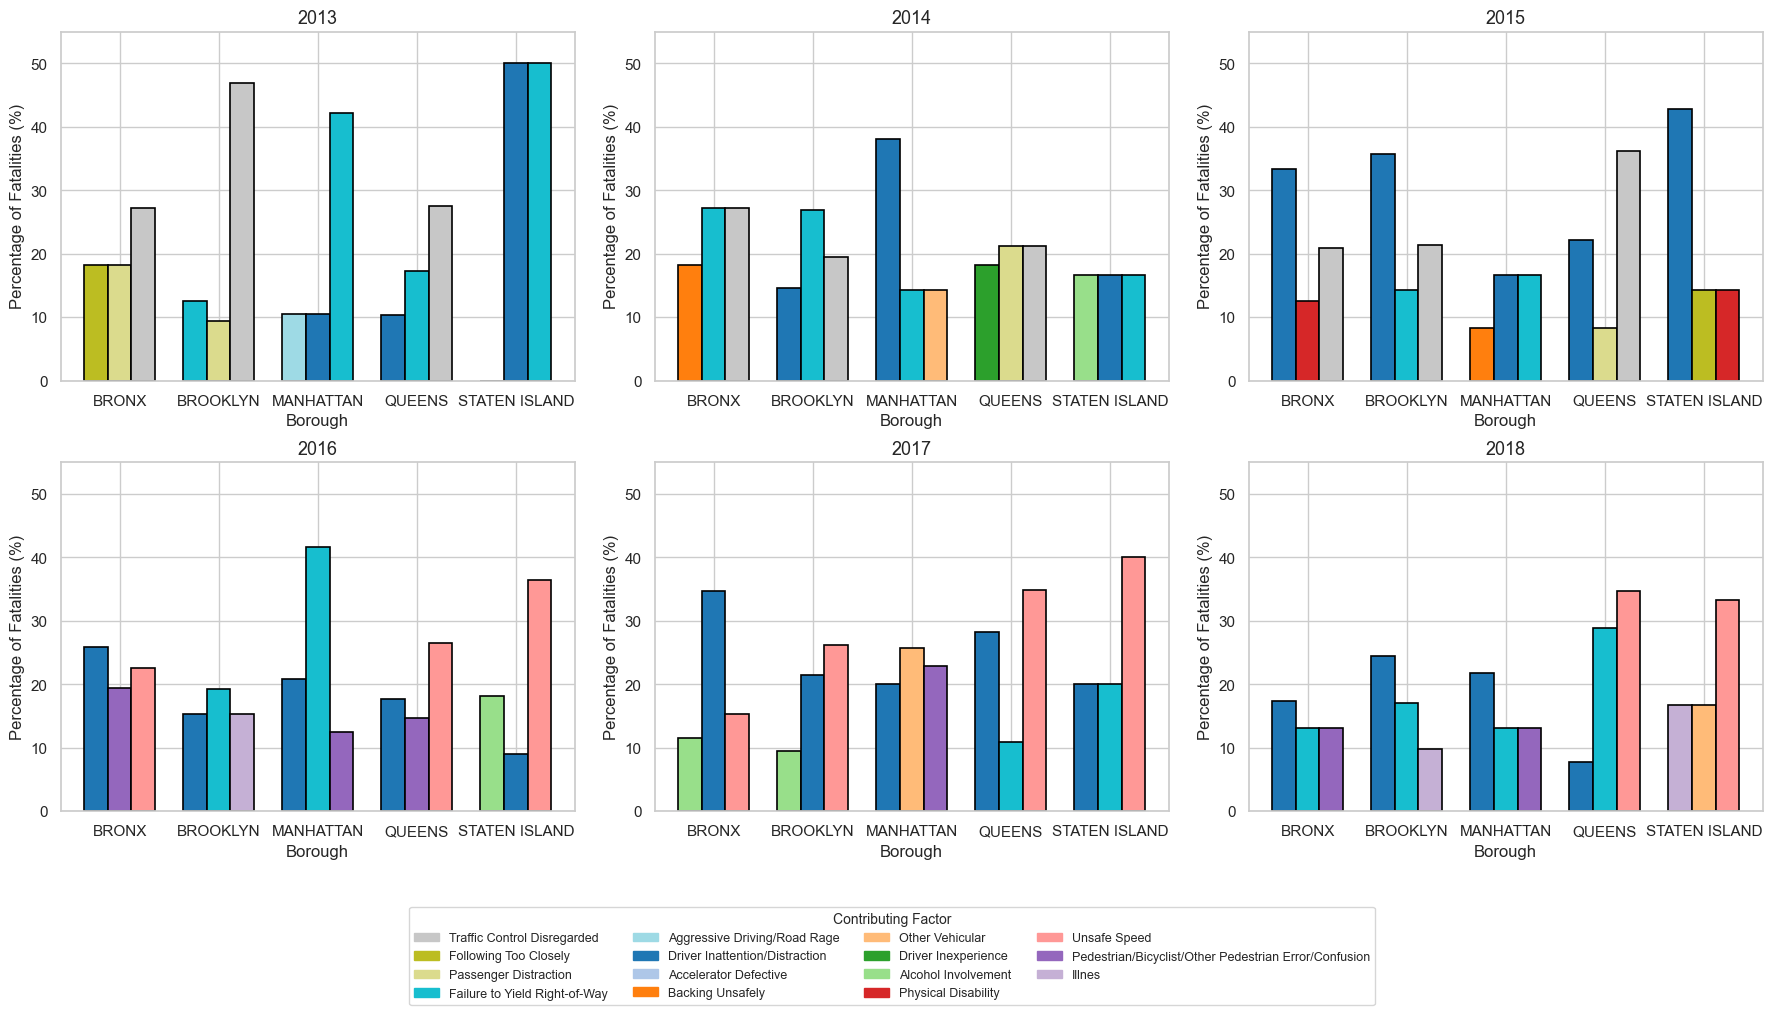

In [60]:
# Calculate top 3 contributing factors for fatalities
top_3_complete = top_3_killed_factors.copy()

# Plot variables
years = sorted(top_3_complete['YEAR'].unique())
boroughs = sorted(top_3_complete['BOROUGH'].unique())
factors = top_3_complete['FACTOR'].unique()

# Setup color mapping
palette = sns.color_palette('tab20', n_colors=20)
shift = 15
rotated_palette = palette[shift:] + palette[:shift]
factor_color_map = dict(zip(factors, rotated_palette))

# Subplots
n_cols = 3
n_rows = -(-len(years) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), squeeze=False)

bar_width = 0.25
space_between_boroughs = 0.3

# Draw bars for each year
for i, year in enumerate(years):
    ax = axes[i // n_cols, i % n_cols]
    data_year = top_3_complete[top_3_complete['YEAR'] == year]

    positions = []
    heights = []
    colors = []
    labels = []

    current_pos = 0
    tick_positions = []
    tick_labels = []

    for borough in boroughs:
        borough_data = data_year[data_year['BOROUGH'] == borough].sort_values('FACTOR')
        n_factors = len(borough_data)
        
        borough_positions = np.arange(current_pos, current_pos + bar_width * n_factors, bar_width)
        positions.extend(borough_positions)
        heights.extend(borough_data['PERCENT'].tolist())
        colors.extend([factor_color_map[f] for f in borough_data['FACTOR']])
        
        tick_positions.append(current_pos + bar_width * (n_factors - 1) / 2)
        tick_labels.append(borough)
        
        current_pos = current_pos + bar_width * n_factors + space_between_boroughs

    bars = ax.bar(positions, heights, width=bar_width, color=colors, edgecolor='black', linewidth=1.2)

    ax.set_title(f'{year}', fontsize=13)
    ax.set_xlabel('Borough')
    ax.set_ylabel('Percentage of Fatalities (%)')
    ax.set_ylim(0, 55)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)

    if ax.get_legend():
        ax.get_legend().remove()

# Remove unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# Shared legend
legend_handles = [mpatches.Patch(color=factor_color_map[f], label=f) for f in factors]

fig.legend(handles=legend_handles,title='Contributing Factor', loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=4, fontsize=9, title_fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.subplots_adjust(bottom=0.18)
plt.savefig('plots/top3_factors_for_killed_in_borough_per_year.png', dpi=300, bbox_inches='tight')
plt.show()

Unsafe speed had increase as factor in number of killed since 2016.

### &nbsp;&nbsp;&nbsp;&nbsp;2.6 Unsafe Speed

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.1 Percent yearly fatalities and injuries due to unsafe speed in NYC

In [61]:
df['YEAR'] = df['DATETIME'].dt.year

# Create mask for "Unsafe Speed" in contributing factor columns
unsafe_speed_mask = (
    (df['CONTRIBUTING FACTOR VEHICLE 1'].str.strip().str.title() == 'Unsafe Speed') |
    (df['CONTRIBUTING FACTOR VEHICLE 2'].str.strip().str.title() == 'Unsafe Speed') |
    (df['CONTRIBUTING FACTOR VEHICLE 3'].str.strip().str.title() == 'Unsafe Speed') |
    (df['CONTRIBUTING FACTOR VEHICLE 4'].str.strip().str.title() == 'Unsafe Speed') |
    (df['CONTRIBUTING FACTOR VEHICLE 5'].str.strip().str.title() == 'Unsafe Speed')
)

# Filter rows where at least one person was killed and unsafe speed was a factor
df_unsafe_speed = df[((df['NUMBER OF PERSONS KILLED'] > 0) | (df['NUMBER OF PERSONS INJURED'] > 0)) & unsafe_speed_mask]

# Group by YEAR and BOROUGH, aggregate killed and injured
df_unsafe_speed = (df_unsafe_speed.groupby(['YEAR', 'BOROUGH'], observed=True)[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED']].sum().
    rename(columns={'NUMBER OF PERSONS KILLED': 'TOTAL_KILLED', 'NUMBER OF PERSONS INJURED': 'TOTAL_INJURED' }).reset_index())

# Compute yearly borough-level total killed/injured (all causes)
df_total_borough = (df.groupby(['YEAR', 'BOROUGH'], observed=True)[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED']].sum()
    .rename(columns={'NUMBER OF PERSONS KILLED': 'ALL_KILLED_IN_BOROUGH', 'NUMBER OF PERSONS INJURED': 'ALL_INJURED_IN_BOROUGH'}) .reset_index())

# Merge totals into df_unsafe_speed
df_unsafe_speed = df_unsafe_speed.merge(df_total_borough, on=['YEAR', 'BOROUGH'], how='left')

# Percentages
df_unsafe_speed['PERCENT_KILLED'] = (df_unsafe_speed['TOTAL_KILLED'] / df_unsafe_speed['ALL_KILLED_IN_BOROUGH'] * 100).round(2)
df_unsafe_speed['PERCENT_INJURED'] = ( df_unsafe_speed['TOTAL_INJURED'] / df_unsafe_speed['ALL_INJURED_IN_BOROUGH'] * 100).round(2)
df_total_year = (df_total_borough.groupby('YEAR')[['ALL_KILLED_IN_BOROUGH', 'ALL_INJURED_IN_BOROUGH']].sum()
    .rename(columns={'ALL_KILLED_IN_BOROUGH': 'YEAR_TOTAL_KILLED','ALL_INJURED_IN_BOROUGH': 'YEAR_TOTAL_INJURED'}) .reset_index())

# Merge into df_unsafe_speed
df_unsafe_speed = df_unsafe_speed.merge(df_total_year, on='YEAR', how='left')
df_unsafe_speed['PERCENT_YEARLY_KILLED'] = (df_unsafe_speed['TOTAL_KILLED'] / df_unsafe_speed['YEAR_TOTAL_KILLED'] * 100).round(2)
df_unsafe_speed['PERCENT_YEARLY_INJURED'] = (df_unsafe_speed['TOTAL_INJURED'] / df_unsafe_speed['YEAR_TOTAL_INJURED'] * 100).round(2)

In [62]:
df_unsafe_speed.tail(10)

,YEAR,BOROUGH,TOTAL_KILLED,TOTAL_INJURED,ALL_KILLED_IN_BOROUGH,ALL_INJURED_IN_BOROUGH,PERCENT_KILLED,PERCENT_INJURED,YEAR_TOTAL_KILLED,YEAR_TOTAL_INJURED,PERCENT_YEARLY_KILLED,PERCENT_YEARLY_INJURED
30,2018,BRONX,1,543,28,8927,3.57,6.08,182,48886,0.55,1.11
31,2018,BROOKLYN,2,593,57,15927,3.51,3.72,182,48886,1.10,1.21
32,2018,MANHATTAN,2,171,24,6764,8.33,2.53,182,48886,1.10,0.35
33,2018,QUEENS,17,621,65,14905,26.15,4.17,182,48886,9.34,1.27
34,2018,STATEN ISLAND,2,126,8,2363,25.00,5.33,182,48886,1.10,0.26
35,2019,BRONX,7,353,25,8197,28.00,4.31,176,45270,3.98,0.78
36,2019,BROOKLYN,10,474,58,14409,17.24,3.29,176,45270,5.68,1.05
37,2019,MANHATTAN,6,194,30,6365,20.00,3.05,176,45270,3.41,0.43
38,2019,QUEENS,8,643,56,14053,14.29,4.58,176,45270,4.55,1.42
39,2019,STATEN ISLAND,2,94,7,2246,28.57,4.19,176,45270,1.14,0.21


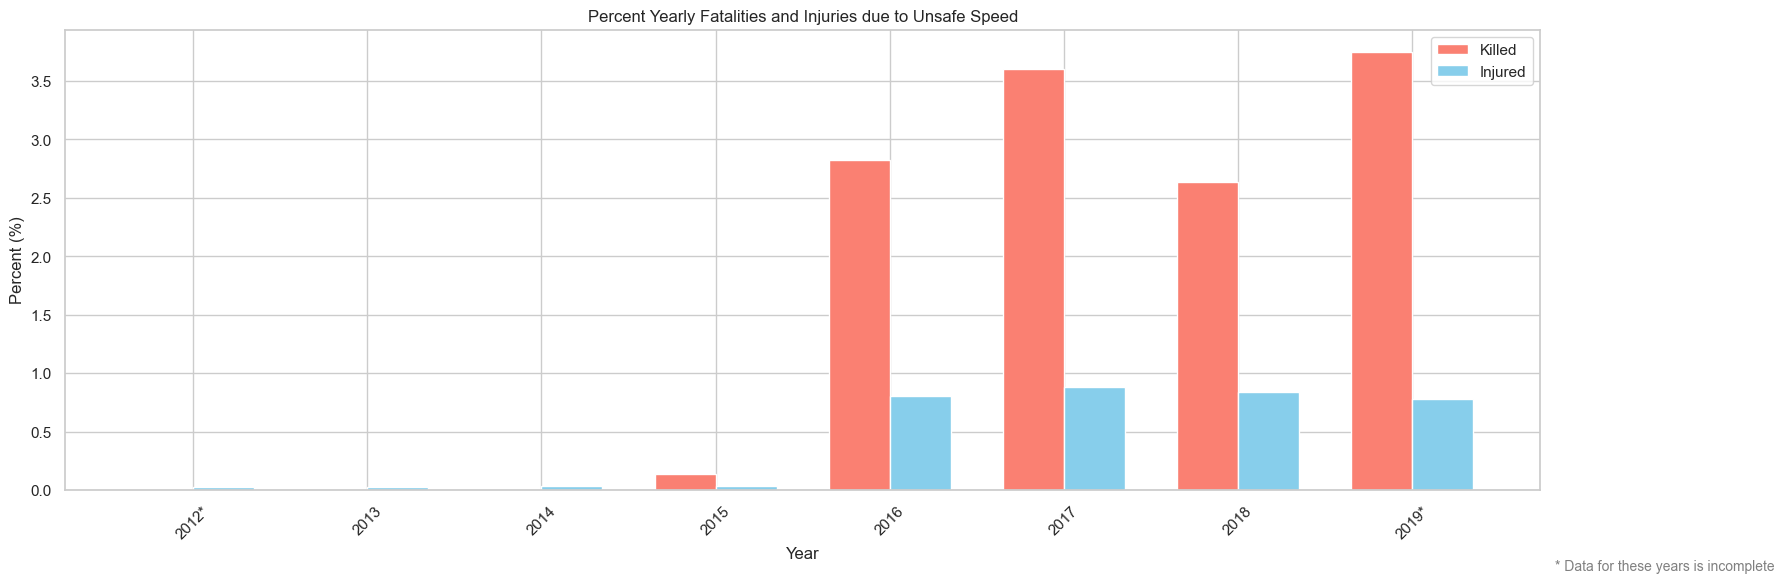

In [63]:
# Sort and prepare data
df_unsafe_speed = df_unsafe_speed.sort_values('YEAR')
years = df_unsafe_speed['YEAR'].unique()
killed = df_unsafe_speed.groupby('YEAR')['PERCENT_YEARLY_KILLED'].mean().values
injured = df_unsafe_speed.groupby('YEAR')['PERCENT_YEARLY_INJURED'].mean().values

x = np.arange(len(years))
width = 0.35

# Modify labels: add * to 2012 and 2019
xtick_labels = [f"{year}*" if year in [2012, 2019] else str(year) for year in years]

# Plot
fig, ax = plt.subplots(figsize=(18, 6))

bars1 = ax.bar(x - width/2, killed, width, label='Killed', color='salmon')
bars2 = ax.bar(x + width/2, injured, width, label='Injured', color='skyblue')

ax.set_xlabel('Year')
ax.set_ylabel('Percent (%)')
ax.set_title('Percent Yearly Fatalities and Injuries due to Unsafe Speed')
ax.set_xticks(x)
ax.set_xticklabels(xtick_labels, rotation=45)
ax.legend()

# Add annotation for the asterisk
ax.text(1.01, -0.15, "* Data for these years is incomplete", transform=ax.transAxes,
        fontsize=10, color='gray', ha='left', va='top')

plt.tight_layout()
plt.savefig('plots/yearly_killed_injured_by_borough_for_unsafespeed.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.2 Unsafe speed - injured

In [64]:
# Filter out years 2012 and 2019
filtered_df = df_unsafe_speed[(df_unsafe_speed['YEAR'] != 2012) & (df_unsafe_speed['YEAR'] != 2019)]

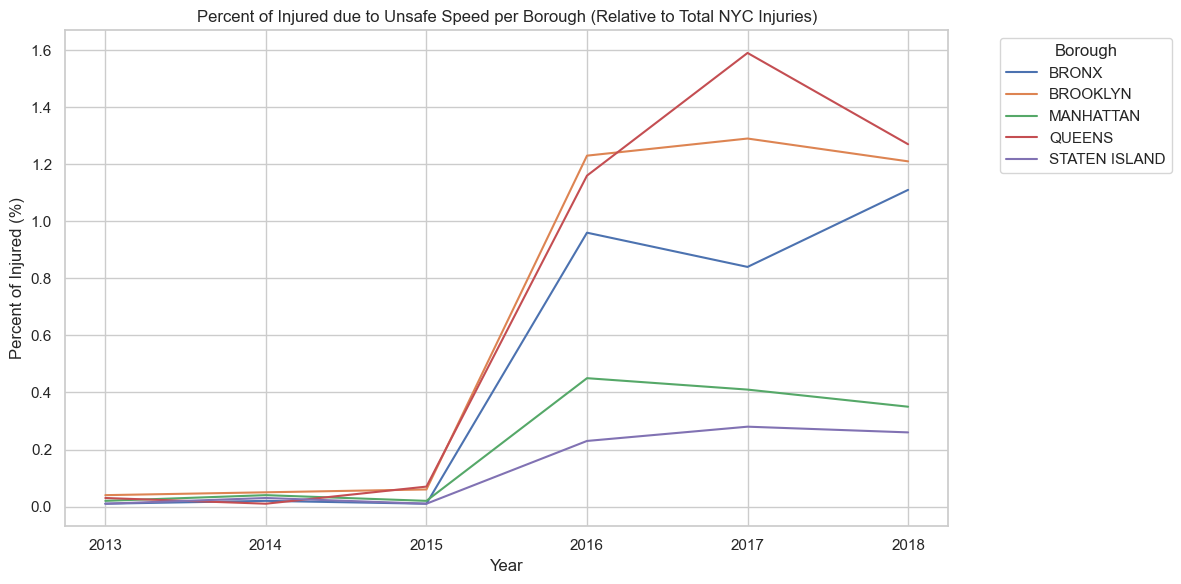

In [65]:
# PERCENT_YEARLY_INJURED per BOROUGH per YEAR (relative to citywide total injuries)
plt.figure(figsize=(12, 6))
for borough in filtered_df['BOROUGH'].dropna().unique():
    borough_data = filtered_df[filtered_df['BOROUGH'] == borough]
    plt.plot(borough_data['YEAR'], borough_data['PERCENT_YEARLY_INJURED'], label=borough)

plt.title('Percent of Injured due to Unsafe Speed per Borough (Relative to Total NYC Injuries)')
plt.xlabel('Year')
plt.ylabel('Percent of Injured (%)')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/percentage_of_injured_by_unsafespeed_per_year_relative_to_all_NYC.png', dpi=300)
plt.show()

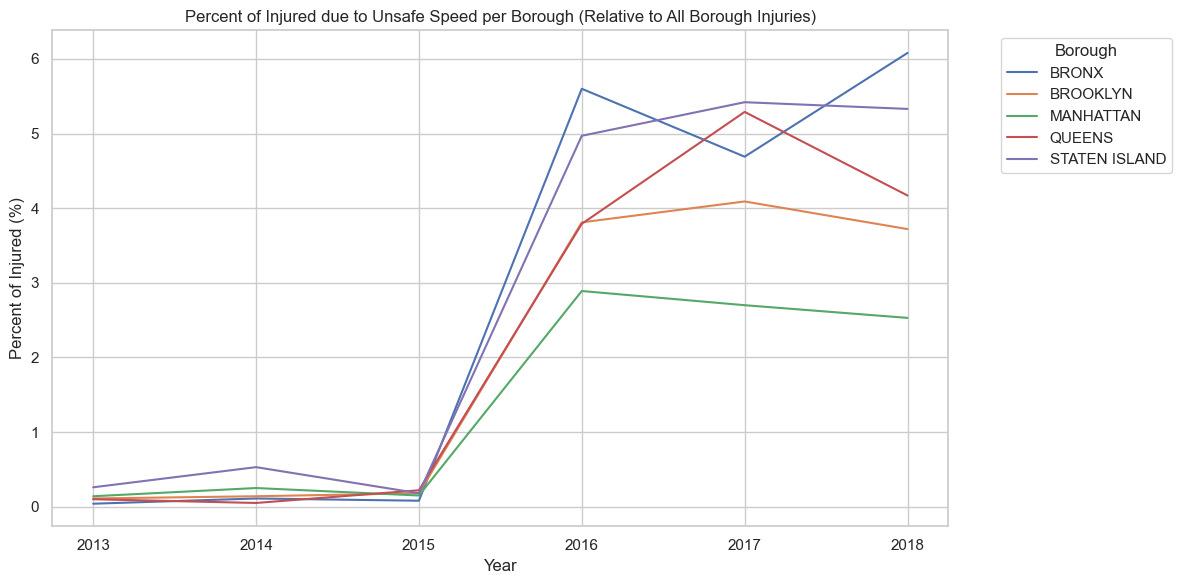

In [66]:
# PERCENT_INJURED per BOROUGH per YEAR (relative to all injuries in that borough)
plt.figure(figsize=(12, 6))
for borough in filtered_df['BOROUGH'].dropna().unique():
    borough_data = filtered_df[filtered_df['BOROUGH'] == borough]
    plt.plot(borough_data['YEAR'], borough_data['PERCENT_INJURED'], label=borough)

plt.title('Percent of Injured due to Unsafe Speed per Borough (Relative to All Borough Injuries)')
plt.xlabel('Year')
plt.ylabel('Percent of Injured (%)')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/percentage_of_injured_by_unsafespeed_per_year_relative_to_all_boroughs.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.3 Unsafe speed - killed

In [67]:
unsafe_speed_killed = (killed_by_factor[killed_by_factor['FACTOR'] == 'Unsafe Speed'].groupby('YEAR')['KILLED'].sum().reset_index())

In [68]:
unsafe_speed_killed

,YEAR,KILLED
0,2013,0
1,2014,0
2,2015,1
3,2016,25
4,2017,36
5,2018,25


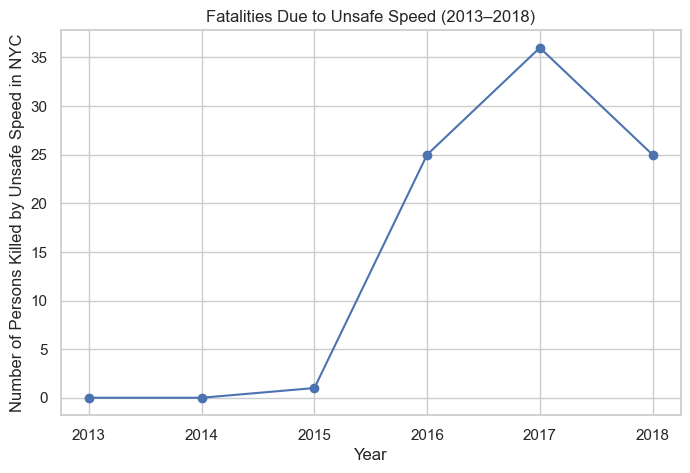

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(unsafe_speed_killed['YEAR'], unsafe_speed_killed['KILLED'], marker='o', linestyle='-')
plt.title('Fatalities Due to Unsafe Speed (2013–2018)')
plt.xlabel('Year')
plt.ylabel('Number of Persons Killed by Unsafe Speed in NYC')
plt.grid(True)
plt.savefig('plots/yearly_killed_by_unsafespeed_NYC.png', dpi=300)
plt.show()

Per borough just by counts

In [70]:
unsafe_speed_by_borough = (killed_by_factor[killed_by_factor['FACTOR'] == 'Unsafe Speed'].groupby(['YEAR', 'BOROUGH'])['KILLED'].sum().reset_index())

In [71]:
unsafe_speed_by_borough.pivot(index='YEAR', columns='BOROUGH', values='KILLED').fillna(0).astype(int)

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
YEAR,,,,,
2013,0,0,0,0,0
2014,0,0,0,0,0
2015,0,1,0,0,0
2016,7,4,1,9,4
2017,4,11,1,16,4
2018,1,2,2,18,2


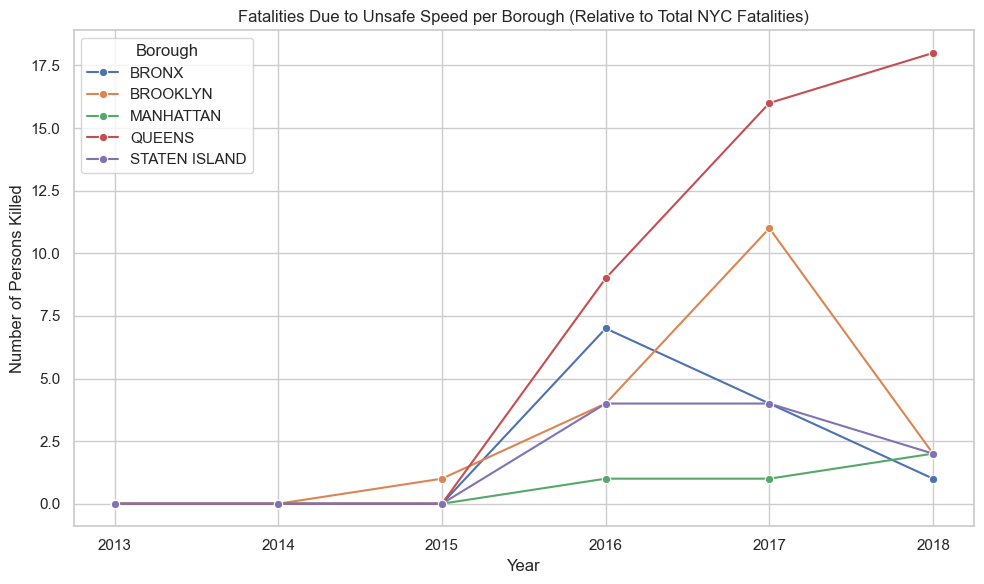

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=unsafe_speed_by_borough, x='YEAR', y='KILLED', hue='BOROUGH', marker='o')

plt.title('Fatalities Due to Unsafe Speed per Borough (Relative to Total NYC Fatalities)')
plt.xlabel('Year')
plt.ylabel('Number of Persons Killed')
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/percentage_of_killed_by_unsafespeed_per_year_relative_to_all_NYC.png', dpi=300)
plt.show()

Per borough as total

In [73]:
total_killed_per_year_borough = (df_filtered.groupby(['YEAR', 'BOROUGH'])['NUMBER OF PERSONS KILLED'].sum().reset_index(name='TOTAL_KILLED'))

In [74]:
unsafe_speed_killed = (df_filtered[df_filtered[factor_cols].apply(lambda row: 'Unsafe Speed' in row.values, axis=1)]
    .groupby(['YEAR', 'BOROUGH'])['NUMBER OF PERSONS KILLED'].sum().reset_index(name='UNSAFE_SPEED_KILLED'))

In [75]:
merged = total_killed_per_year_borough.merge(unsafe_speed_killed, on=['YEAR', 'BOROUGH'], how='left')

# Fill missing values with 0 (in case no "Unsafe Speed" deaths occurred)
merged['UNSAFE_SPEED_KILLED'] = merged['UNSAFE_SPEED_KILLED'].fillna(0)

# Percentage
merged['PERCENT_UNSAFE_SPEED'] = ((merged['UNSAFE_SPEED_KILLED'] / merged['TOTAL_KILLED']) * 100).round(2)

In [76]:
merged

,YEAR,BOROUGH,TOTAL_KILLED,UNSAFE_SPEED_KILLED,PERCENT_UNSAFE_SPEED
0,2013,BRONX,31,0,0.00
1,2013,BROOKLYN,51,0,0.00
2,2013,MANHATTAN,34,0,0.00
3,2013,QUEENS,62,0,0.00
4,2013,STATEN ISLAND,5,0,0.00
5,2014,BRONX,16,0,0.00
6,2014,BROOKLYN,59,0,0.00
7,2014,MANHATTAN,32,0,0.00
8,2014,QUEENS,62,0,0.00
9,2014,STATEN ISLAND,8,0,0.00


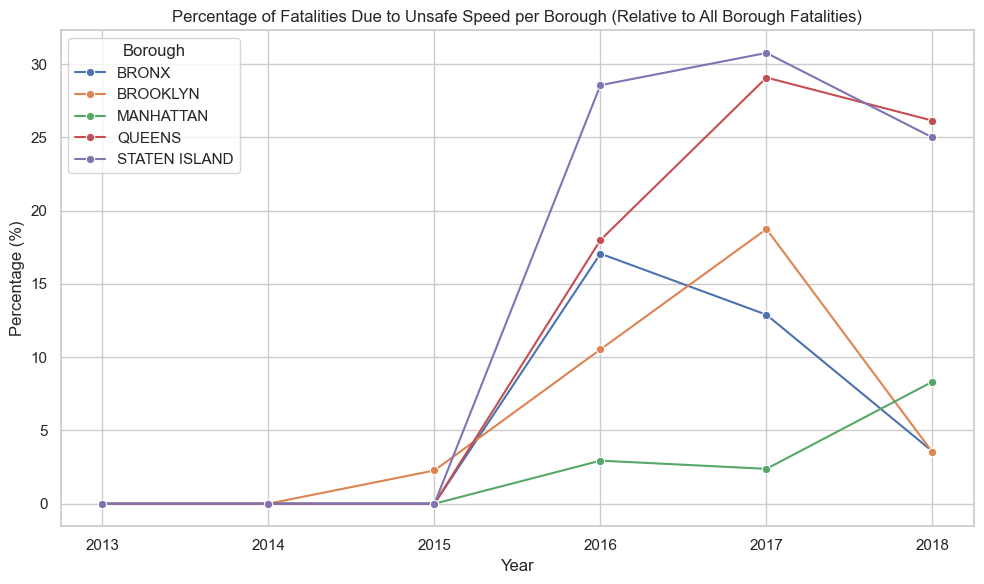

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=merged,
    x='YEAR',
    y='PERCENT_UNSAFE_SPEED',
    hue='BOROUGH',
    marker='o'
)

plt.title('Percentage of Fatalities Due to Unsafe Speed per Borough (Relative to All Borough Fatalities)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.legend(title='Borough')
plt.tight_layout()
plt.savefig('plots/percentage_of_killed_by_unsafespeed_per_year_relative_to_all_boroughs.png', dpi=300)
plt.show()

### &nbsp;&nbsp;&nbsp;&nbsp;2.7 Vehicles frequency

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.1 Percentage of vehicle types involved in collisins in NYC

In [78]:
vehicle_cols = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

all_vehicles = df[vehicle_cols].stack().str.strip().str.title()

# Remove empty or unknown types
all_vehicles = all_vehicles[all_vehicles != '']

vehicle_counts = all_vehicles.value_counts()
vehicle_unique = all_vehicles.nunique()

vehicle_counts_df = vehicle_counts.reset_index()
vehicle_counts_df.columns = ['VEHICLE_TYPE', 'COUNT']

# Total number of vehicle entries
total_vehicle_count = vehicle_counts_df['COUNT'].sum()

# Add percentage column
vehicle_counts_df['PERCENT'] = (vehicle_counts_df['COUNT'] / total_vehicle_count * 100).round(2)

print(f"Number of unique vehicle types: {vehicle_unique}")
print(f"Number of total vehicle count: {total_vehicle_count}")

vehicle_counts_df.head(10)

Number of unique vehicle types: 596
Number of total vehicle count: 2304254


,VEHICLE_TYPE,COUNT,PERCENT
0,Passenger Vehicle,918292,39.85
1,Sport Utility / Station Wagon,616080,26.74
2,Sedan,229657,9.97
3,Unknown,139583,6.06
4,Taxi,95136,4.13
5,Pick-Up Truck,51419,2.23
6,Van,40198,1.74
7,Other,33689,1.46
8,Bike,32877,1.43
9,Bus,31214,1.35


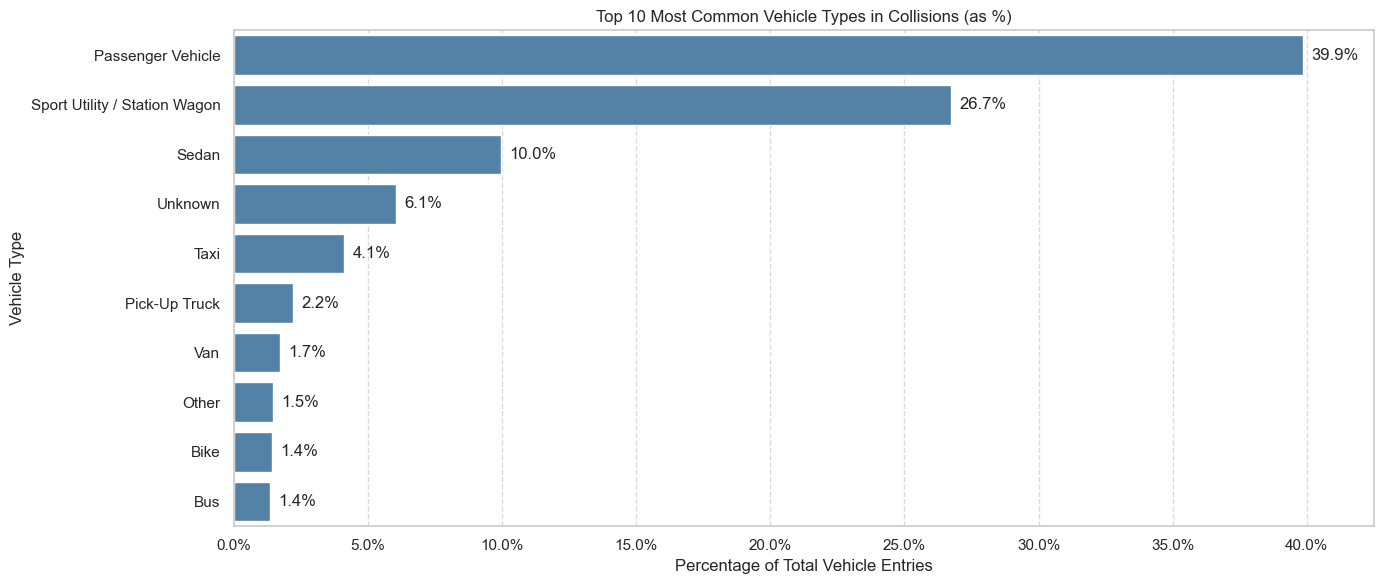

In [79]:
# Select top 10 by count
top10_df = vehicle_counts_df.head(10)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=top10_df, x='PERCENT', y='VEHICLE_TYPE', color='steelblue')

# Add percentage text beside bars
for i, percent in enumerate(top10_df['PERCENT']):
    ax.text(percent + 0.3, i, f'{percent:.1f}%', va='center')

# Set x-axis as percent with grid lines every 5%
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(range(0, int(top10_df['PERCENT'].max()) + 6, 5))  # ticks every 5%
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_xlim(0, 42.5)

# Labels and title
plt.xlabel('Percentage of Total Vehicle Entries')
plt.ylabel('Vehicle Type')
plt.title('Top 10 Most Common Vehicle Types in Collisions (as %)')
plt.tight_layout()
plt.savefig('plots/top10_vehicle_types_in_collisions_NYC.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.2 Percentage of contributing factors for the top 6 vehicle types involved in collisins in NYC

In [80]:
vehicles_long = df[vehicle_cols].melt(value_name='VEHICLE_TYPE')['VEHICLE_TYPE'].str.strip().str.title()
factors_long = df[factor_cols].melt(value_name='FACTOR')['FACTOR'].str.strip().str.title()

# Combine into one DataFrame
vf_df = pd.DataFrame({'VEHICLE_TYPE': vehicles_long,'FACTOR': factors_long})

# Clean
vf_df = vf_df[
    (vf_df['VEHICLE_TYPE'].notna()) & (vf_df['VEHICLE_TYPE'] != '') & (vf_df['FACTOR'].notna()) & 
    (vf_df['FACTOR'] != '') & (vf_df['FACTOR'] != 'Unspecified')]

# Count combinations
vf_counts = vf_df.value_counts().reset_index(name='COUNT')

# Compute total counts per vehicle type from the full combination data
total_counts_per_vehicle = vf_counts.groupby('VEHICLE_TYPE')['COUNT']

# Merge back into the original combination DataFrame to compute % properly
vf_counts['TOTAL_COUNT'] = vf_counts['VEHICLE_TYPE'].map(total_counts_per_vehicle.sum())
vf_counts['PERCENT_WITHIN_VEHICLE'] = (vf_counts['COUNT'] / vf_counts['TOTAL_COUNT'] * 100).round(3)

# Sort
vf_counts_sorted = vf_counts.sort_values('COUNT', ascending=False)

# Merge vehicle-level percentage from vehicle_counts_df into vf_counts_sorted
vf_counts_sorted = vf_counts_sorted.merge(vehicle_counts_df[['VEHICLE_TYPE', 'PERCENT']],on='VEHICLE_TYPE',how='left')

# Rename the column for clarity
vf_counts_sorted.rename(columns={'PERCENT': 'PERCENT_OF_ALL_VEHICLES'}, inplace=True)
vf_counts_sorted['PERCENT_OF_ALL_VEHICLES'] = vf_counts_sorted['PERCENT_OF_ALL_VEHICLES'].round(2)

# Show top 10 combinations
vf_counts_sorted.head(10)

,VEHICLE_TYPE,FACTOR,COUNT,TOTAL_COUNT,PERCENT_WITHIN_VEHICLE,PERCENT_OF_ALL_VEHICLES
0,Passenger Vehicle,Driver Inattention/Distraction,101023,346501,29.155,39.85
1,Sport Utility / Station Wagon,Driver Inattention/Distraction,81931,262852,31.170,26.74
2,Sedan,Driver Inattention/Distraction,38760,112036,34.596,9.97
3,Passenger Vehicle,Failure To Yield Right-Of-Way,31208,346501,9.007,39.85
4,Sport Utility / Station Wagon,Following Too Closely,25361,262852,9.648,26.74
5,Passenger Vehicle,Following Too Closely,24058,346501,6.943,39.85
6,Sport Utility / Station Wagon,Failure To Yield Right-Of-Way,23648,262852,8.997,26.74
7,Passenger Vehicle,Other Vehicular,22169,346501,6.398,39.85
8,Passenger Vehicle,Fatigued/Drowsy,19815,346501,5.719,39.85
9,Passenger Vehicle,Backing Unsafely,18836,346501,5.436,39.85


In [81]:
vf_counts_sorted[vf_counts_sorted['VEHICLE_TYPE'] == 'Sedan'].head(10)

,VEHICLE_TYPE,FACTOR,COUNT,TOTAL_COUNT,PERCENT_WITHIN_VEHICLE,PERCENT_OF_ALL_VEHICLES
2,Sedan,Driver Inattention/Distraction,38760,112036,34.596,9.97
14,Sedan,Following Too Closely,13425,112036,11.983,9.97
19,Sedan,Failure To Yield Right-Of-Way,9762,112036,8.713,9.97
29,Sedan,Passing Or Lane Usage Improper,6310,112036,5.632,9.97
30,Sedan,Backing Unsafely,6105,112036,5.449,9.97
35,Sedan,Other Vehicular,5383,112036,4.805,9.97
36,Sedan,Passing Too Closely,5063,112036,4.519,9.97
39,Sedan,Unsafe Lane Changing,4733,112036,4.225,9.97
55,Sedan,Turning Improperly,3110,112036,2.776,9.97
57,Sedan,Traffic Control Disregarded,2527,112036,2.256,9.97


In [82]:
vf_counts_sorted[vf_counts_sorted['VEHICLE_TYPE'] == 'Sedan']['PERCENT_WITHIN_VEHICLE'].sum()

np.float64(100.001)

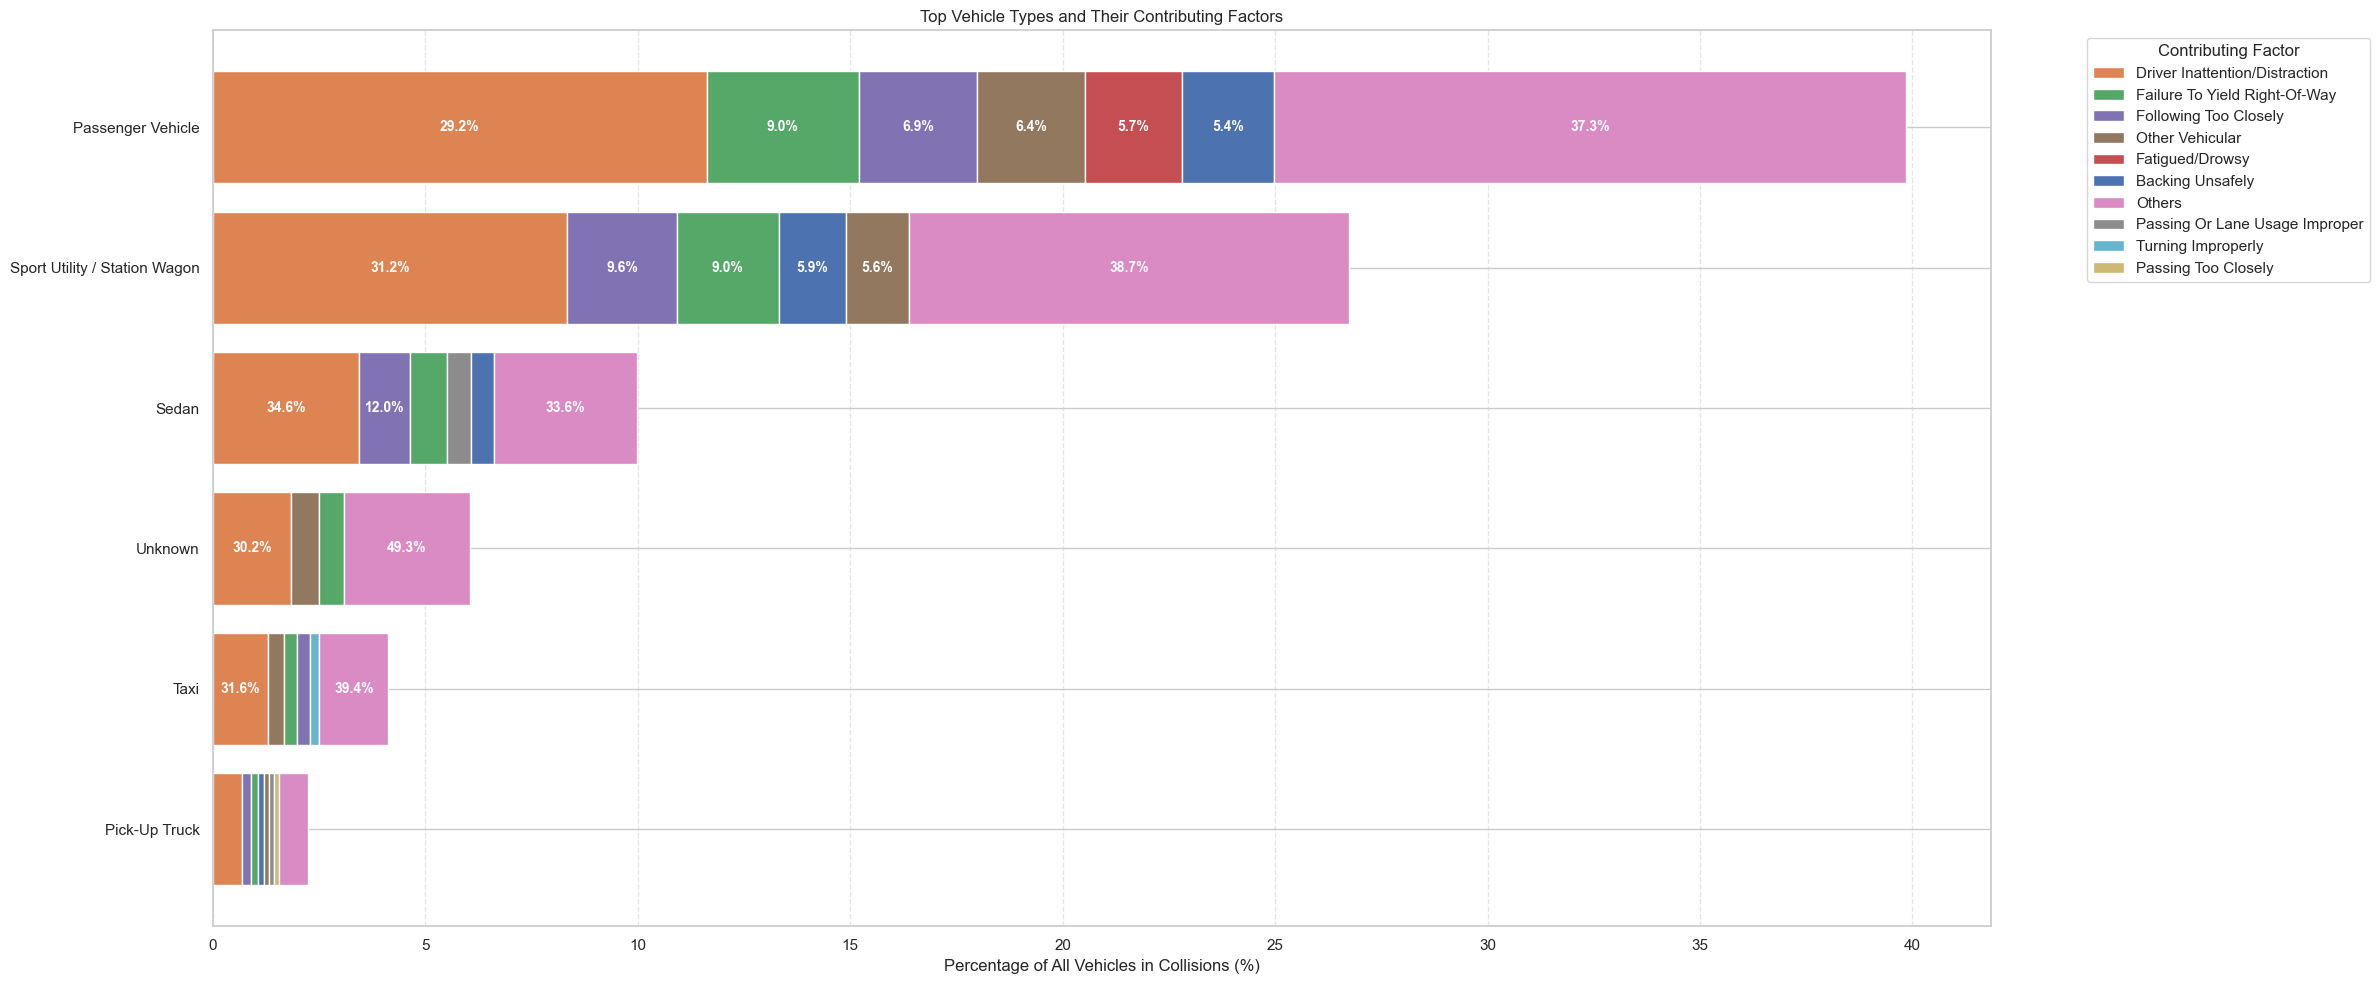

In [83]:
# Select top vehicle types (sorted descending by PERCENT_OF_ALL_VEHICLES)
top_vehicles = vf_counts_sorted[['VEHICLE_TYPE', 'PERCENT_OF_ALL_VEHICLES']].drop_duplicates()
top_vehicles = top_vehicles.nlargest(6, 'PERCENT_OF_ALL_VEHICLES')

# Filter and copy relevant data
top_vf = vf_counts_sorted[vf_counts_sorted['VEHICLE_TYPE'].isin(top_vehicles['VEHICLE_TYPE'])].copy()

# Group small contributing factors (<5%) into "Others"
top_vf['FACTOR'] = top_vf.apply( lambda row: 'Others' if row['PERCENT_WITHIN_VEHICLE'] < 5 else row['FACTOR'], axis=1)

# Re-aggregate data (now including 'Others')
agg_vf = ( top_vf.groupby(['VEHICLE_TYPE', 'FACTOR'], as_index=False).agg({'COUNT': 'sum'}))

# Add back TOTAL_COUNT and vehicle % (for scaling the stacked bars)
agg_vf = agg_vf.merge(vf_counts_sorted[['VEHICLE_TYPE', 'TOTAL_COUNT', 'PERCENT_OF_ALL_VEHICLES']].drop_duplicates(), on='VEHICLE_TYPE', how='left')

# Recompute within-vehicle percent and stacked percent
agg_vf['PERCENT_WITHIN_VEHICLE'] = (agg_vf['COUNT'] / agg_vf['TOTAL_COUNT'] * 100)
agg_vf['PERCENT_STACKED'] = agg_vf['PERCENT_WITHIN_VEHICLE'] * agg_vf['PERCENT_OF_ALL_VEHICLES'] / 100

# Define vehicle order descending by occurrence (percent of all vehicles)
vehicle_order = top_vehicles.sort_values('PERCENT_OF_ALL_VEHICLES', ascending=False)['VEHICLE_TYPE'].tolist()

# Convert VEHICLE_TYPE to categorical with this order for plotting
agg_vf['VEHICLE_TYPE'] = pd.Categorical(agg_vf['VEHICLE_TYPE'], categories=vehicle_order, ordered=True)

# Plot stacked horizontal bar chart with ordering and labels
plt.figure(figsize=(24, 10))
bottoms = {}

# Prepare color palette for factors
factor_palette = sns.color_palette('deep', n_colors=agg_vf['FACTOR'].nunique())
factor_list = agg_vf['FACTOR'].unique().tolist()

for vehicle in vehicle_order:
    vehicle_data = agg_vf[agg_vf['VEHICLE_TYPE'] == vehicle].copy()
    
    # Sort factors by COUNT descending, but move 'Others' to the end
    others = vehicle_data[vehicle_data['FACTOR'] == 'Others']
    non_others = vehicle_data[vehicle_data['FACTOR'] != 'Others'].sort_values('COUNT', ascending=False)
    sorted_data = pd.concat([non_others, others], ignore_index=True)
    
    left = 0
    for _, row in sorted_data.iterrows():
        color = factor_palette[factor_list.index(row['FACTOR'])]
        
        plt.barh(
            vehicle,
            row['PERCENT_STACKED'],
            left=left,
            label=row['FACTOR'] if (row['FACTOR'] not in bottoms) else None,
            color=color
        )
        
        # Add percentage label inside bar showing percent within vehicle
        if row['PERCENT_STACKED'] > 1:  # adjust threshold as needed
            plt.text(
                left + row['PERCENT_STACKED'] / 2,
                vehicle,
                f"{row['PERCENT_WITHIN_VEHICLE']:.1f}%",
                va='center',
                ha='center',
                fontsize=10,
                color='white',
                fontweight='bold'
            )
        
        left += row['PERCENT_STACKED']
        bottoms[row['FACTOR']] = True

# Format plot
plt.xlabel('Percentage of All Vehicles in Collisions (%)')
plt.title('Top Vehicle Types and Their Contributing Factors')
plt.legend(title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(rotation=0)
plt.xticks(range(0, 45, 5))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()  # Highest vehicle on top
plt.tight_layout()
plt.savefig('plots/top6_vehicle_types_with_factors_NYC.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.3 Percentage of contributing factors for the top 5 vehicle types involved in fatal collisins in NYC

In [84]:
# Filter rows where at least one person was killed
df_killed = df[df['NUMBER OF PERSONS KILLED'] > 0].copy()

# Melt vehicle types and factors into long format
vehicle_cols = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

factor_cols = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']

# Melt both into long format
vehicles_long = df_killed[vehicle_cols].melt(value_name='VEHICLE_TYPE')['VEHICLE_TYPE'].str.strip().str.title()
factors_long = df_killed[factor_cols].melt(value_name='FACTOR')['FACTOR'].str.strip().str.title()

# Combine vehicle and factor into one DataFrame
vf_killed_df = pd.DataFrame({'VEHICLE_TYPE': vehicles_long, 'FACTOR': factors_long})

# Clean: Remove missing/empty/unspecified
vf_killed_df = vf_killed_df[
    (vf_killed_df['VEHICLE_TYPE'].notna()) & (vf_killed_df['VEHICLE_TYPE'] != '') &
    (vf_killed_df['FACTOR'].notna()) & (vf_killed_df['FACTOR'] != '') &
    (vf_killed_df['FACTOR'] != 'Unspecified')
]

# The number of times a specific combination of VEHICLE_TYPE and FACTOR appeared in crashes where at least one person was killed
vf_killed_counts = vf_killed_df.value_counts().reset_index(name='COUNT')

# Sort descending
vf_killed_counts_sorted = vf_killed_counts.sort_values('COUNT', ascending=False)

vf_killed_counts_sorted.head(10)

,VEHICLE_TYPE,FACTOR,COUNT
0,Sport Utility / Station Wagon,Driver Inattention/Distraction,56
1,Passenger Vehicle,Driver Inattention/Distraction,48
2,Passenger Vehicle,Traffic Control Disregarded,47
3,Passenger Vehicle,Failure To Yield Right-Of-Way,38
4,Sport Utility / Station Wagon,Failure To Yield Right-Of-Way,34
5,Passenger Vehicle,Unsafe Speed,33
6,Sedan,Unsafe Speed,27
7,Motorcycle,Unsafe Speed,24
8,Motorcycle,Traffic Control Disregarded,24
9,Sport Utility / Station Wagon,Traffic Control Disregarded,23


In [85]:
# Compute total counts per vehicle type (in killed data)
total_counts_per_vehicle_killed = vf_killed_counts_sorted.groupby('VEHICLE_TYPE')['COUNT'].sum()

# Add TOTAL_COUNT column to vf_killed_counts_sorted
vf_killed_counts_sorted['TOTAL_COUNT'] = vf_killed_counts_sorted['VEHICLE_TYPE'].map(total_counts_per_vehicle_killed)

#  Calculate percent within each vehicle type (factor count / total count per vehicle)
vf_killed_counts_sorted['PERCENT_WITHIN_VEHICLE'] = (vf_killed_counts_sorted['COUNT'] / vf_killed_counts_sorted['TOTAL_COUNT'] * 100).round(3)

# Calculate total fatal vehicle counts (sum of all counts in the df)
total_fatal_vehicles = vf_killed_counts_sorted['COUNT'].sum()

# Calculate percent of all fatal vehicles per vehicle type
percent_of_all_fatal_vehicles = total_counts_per_vehicle_killed / total_fatal_vehicles * 100

# Map percent of all fatal vehicles back to the dataframe
vf_killed_counts_sorted['PERCENT_OF_ALL_FATAL_VEHICLES'] = vf_killed_counts_sorted['VEHICLE_TYPE'].map(percent_of_all_fatal_vehicles).round(2)

# Sort descending by COUNT
vf_killed_counts_sorted = vf_killed_counts_sorted.sort_values('COUNT', ascending=False)

vf_killed_counts_sorted.head(10)

,VEHICLE_TYPE,FACTOR,COUNT,TOTAL_COUNT,PERCENT_WITHIN_VEHICLE,PERCENT_OF_ALL_FATAL_VEHICLES
0,Sport Utility / Station Wagon,Driver Inattention/Distraction,56,224,25.000,24.89
1,Passenger Vehicle,Driver Inattention/Distraction,48,281,17.082,31.22
2,Passenger Vehicle,Traffic Control Disregarded,47,281,16.726,31.22
3,Passenger Vehicle,Failure To Yield Right-Of-Way,38,281,13.523,31.22
4,Sport Utility / Station Wagon,Failure To Yield Right-Of-Way,34,224,15.179,24.89
5,Passenger Vehicle,Unsafe Speed,33,281,11.744,31.22
6,Sedan,Unsafe Speed,27,73,36.986,8.11
7,Motorcycle,Unsafe Speed,24,95,25.263,10.56
8,Motorcycle,Traffic Control Disregarded,24,95,25.263,10.56
9,Sport Utility / Station Wagon,Traffic Control Disregarded,23,224,10.268,24.89


In [86]:
# Select top vehicle types (sorted descending by PERCENT_OF_ALL_VEHICLES)
top_vehicles = vf_killed_counts_sorted[['VEHICLE_TYPE', 'PERCENT_OF_ALL_FATAL_VEHICLES']].drop_duplicates()
top_vehicles = top_vehicles.nlargest(5, 'PERCENT_OF_ALL_FATAL_VEHICLES')

# Filter and copy relevant data
top_vf = vf_killed_counts_sorted[vf_killed_counts_sorted['VEHICLE_TYPE'].isin(top_vehicles['VEHICLE_TYPE'])].copy()

# Group small contributing factors (<5%) into "Others"
top_vf['FACTOR'] = top_vf.apply( lambda row: 'Others' if row['PERCENT_WITHIN_VEHICLE'] < 5 else row['FACTOR'],axis=1)

# Re-aggregate data including 'Others'
agg_vf = ( top_vf.groupby(['VEHICLE_TYPE', 'FACTOR'], as_index=False).agg({'COUNT': 'sum'}))

# Add back TOTAL_COUNT and PERCENT_OF_ALL_VEHICLES for scaling bars
agg_vf = agg_vf.merge(vf_killed_counts_sorted[['VEHICLE_TYPE', 'TOTAL_COUNT', 'PERCENT_OF_ALL_FATAL_VEHICLES']].drop_duplicates(), on='VEHICLE_TYPE', how='left')

# Recompute percentages
agg_vf['PERCENT_WITHIN_VEHICLE'] = (agg_vf['COUNT'] / agg_vf['TOTAL_COUNT'] * 100)
agg_vf['PERCENT_STACKED'] = agg_vf['PERCENT_WITHIN_VEHICLE'] * agg_vf['PERCENT_OF_ALL_FATAL_VEHICLES'] / 100

# Define vehicle order descending by occurrence
vehicle_order = top_vehicles.sort_values('PERCENT_OF_ALL_FATAL_VEHICLES', ascending=False)['VEHICLE_TYPE'].tolist()

# Convert VEHICLE_TYPE to categorical with this order for consistent plotting order
agg_vf['VEHICLE_TYPE'] = pd.Categorical(agg_vf['VEHICLE_TYPE'], categories=vehicle_order, ordered=True)

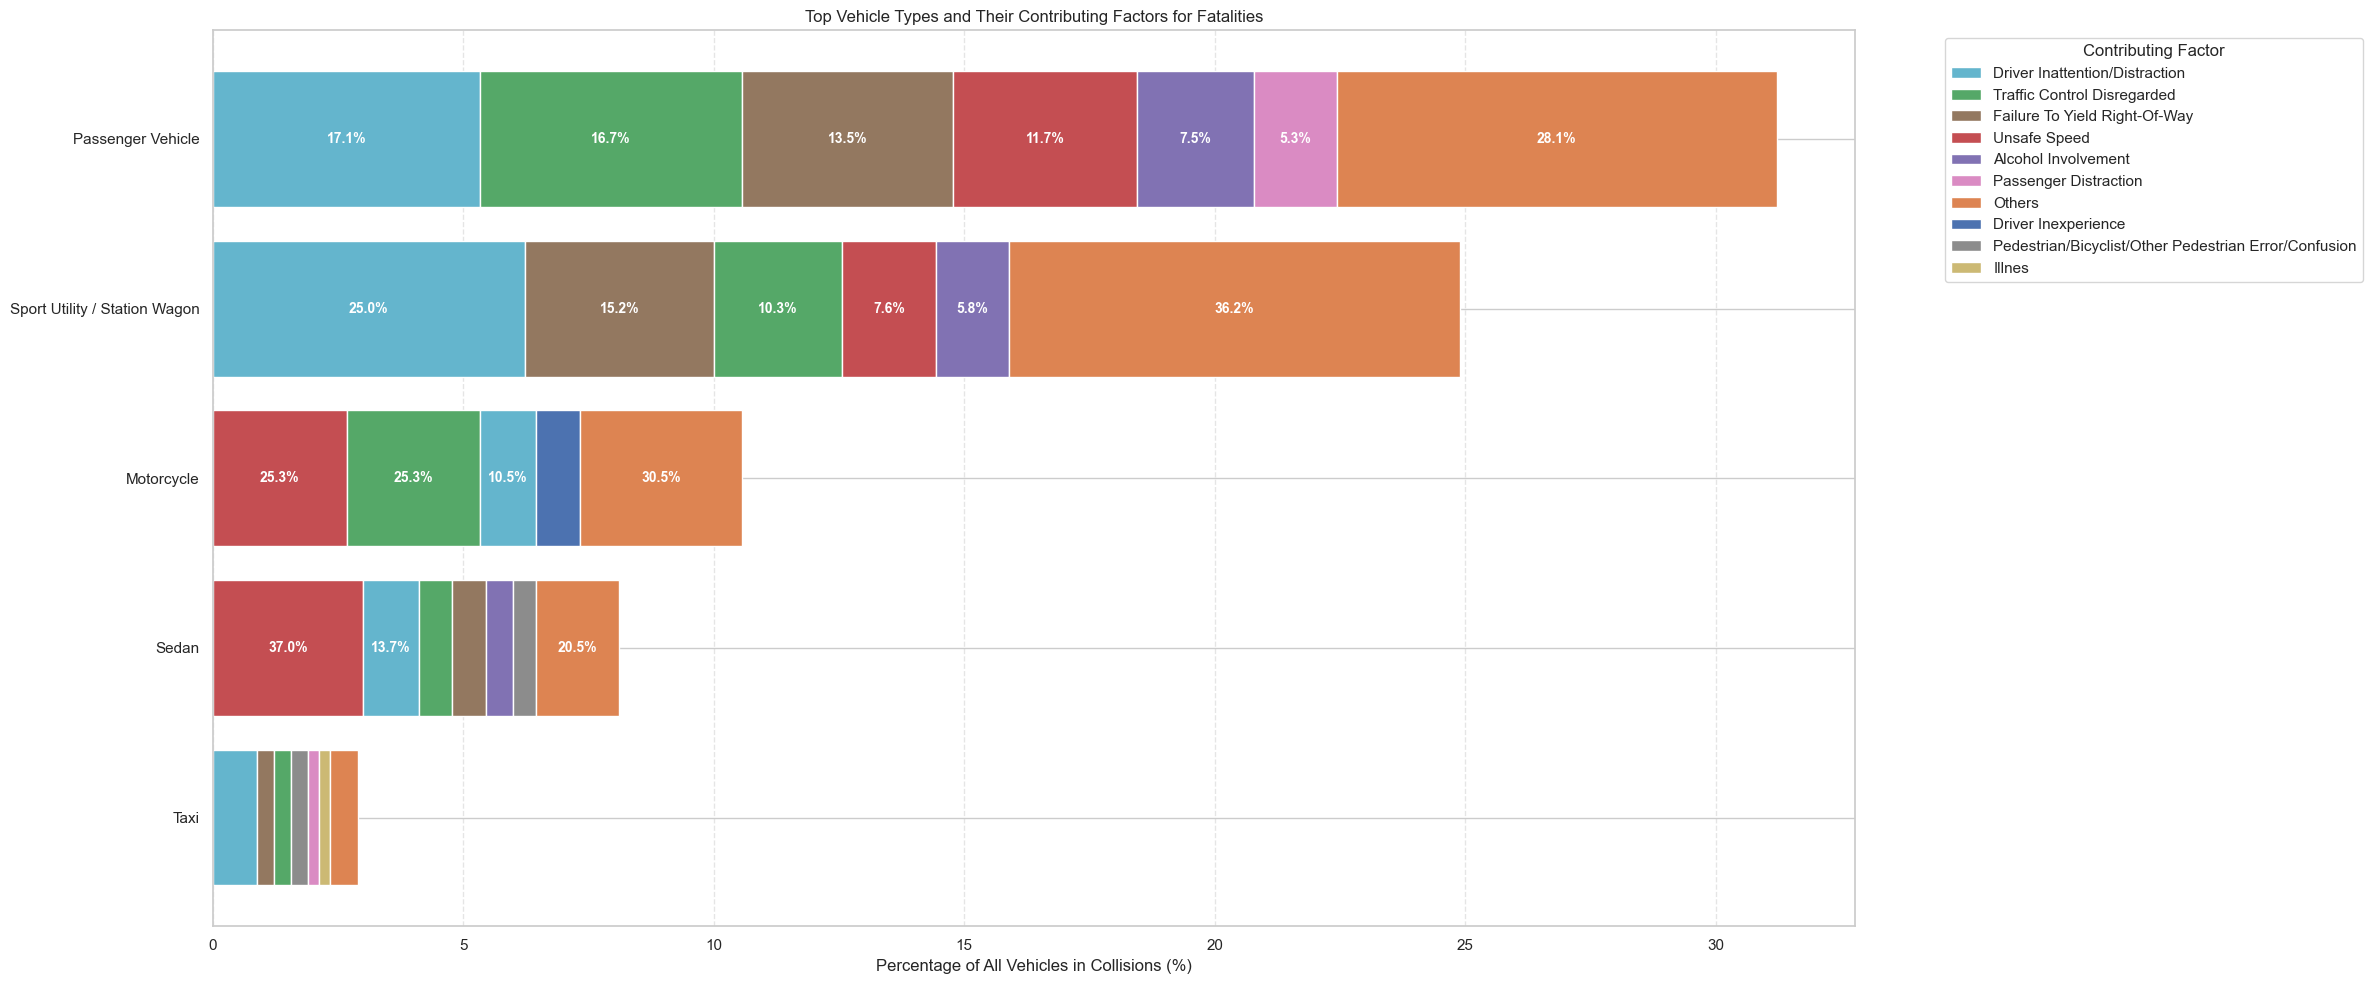

In [87]:
plt.figure(figsize=(24, 10))
bottoms = {}  # Track which factors are already labeled to avoid duplicates

# Color palette for unique factors
factor_palette = sns.color_palette('deep', n_colors=agg_vf['FACTOR'].nunique())
k = 9
factor_palette = factor_palette[k:] + factor_palette[:k]
factor_list = agg_vf['FACTOR'].unique().tolist()

for vehicle in vehicle_order:
    vehicle_data = agg_vf[agg_vf['VEHICLE_TYPE'] == vehicle].copy()
    
    # Sort factors by COUNT descending, with 'Others' always last
    others = vehicle_data[vehicle_data['FACTOR'] == 'Others']
    non_others = vehicle_data[vehicle_data['FACTOR'] != 'Others'].sort_values('COUNT', ascending=False)
    sorted_data = pd.concat([non_others, others], ignore_index=True)
    
    left = 0
    for _, row in sorted_data.iterrows():
        color = factor_palette[factor_list.index(row['FACTOR'])]
        
        plt.barh(
            vehicle,
            row['PERCENT_STACKED'],
            left=left,
            label=row['FACTOR'] if (row['FACTOR'] not in bottoms) else None,
            color=color
        )
        
        # Add label inside bar if wide enough (>1%)
        if row['PERCENT_STACKED'] > 1:
            plt.text(
                left + row['PERCENT_STACKED'] / 2,
                vehicle,
                f"{row['PERCENT_WITHIN_VEHICLE']:.1f}%",
                va='center',
                ha='center',
                fontsize=10,
                color='white',
                fontweight='bold'
            )
        
        left += row['PERCENT_STACKED']
        bottoms[row['FACTOR']] = True

# Final formatting
plt.xlabel('Percentage of All Vehicles in Collisions (%)')
plt.title('Top Vehicle Types and Their Contributing Factors for Fatalities')
plt.legend(title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(rotation=0)
plt.xticks(range(0, 32, 5))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()  # Put highest occurrence vehicle on top
plt.tight_layout()
plt.savefig('plots/top5_vehicle_types_with_factors_for_killed_NYC.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.4 Top 5 vehicle types involved in fatal collisions due to unsafe speed per borough

In [88]:
# Filter rows where at least one person was killed
df_killed = df[df['NUMBER OF PERSONS KILLED'] > 0].copy()

# Prepare to melt vehicles and factors, but keep BOROUGH alongside
# For this, replicate BOROUGH column for each vehicle/factor in each row

vehicle_cols = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

factor_cols = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']

# Melt vehicle types to long format, keeping BOROUGH aligned
vehicles_long = (df_killed.loc[:, ['BOROUGH'] + vehicle_cols].melt(id_vars='BOROUGH', value_vars=vehicle_cols, value_name='VEHICLE_TYPE'))

# Melt factors similarly, keeping BOROUGH aligned
factors_long = (df_killed.loc[:, ['BOROUGH'] + factor_cols].melt(id_vars='BOROUGH', value_vars=factor_cols, value_name='FACTOR'))

# Clean and format string columns
vehicles_long['VEHICLE_TYPE'] = vehicles_long['VEHICLE_TYPE'].str.strip().str.title()
factors_long['FACTOR'] = factors_long['FACTOR'].str.strip().str.title()

# Now combine vehicle and factor long dfs on BOROUGH and the index (row positions)
vf_killed_df = pd.DataFrame({'BOROUGH': vehicles_long['BOROUGH'], 'VEHICLE_TYPE': vehicles_long['VEHICLE_TYPE'], 'FACTOR': factors_long['FACTOR']})

# Remove missing/empty/unspecified
vf_killed_df = vf_killed_df[
    (vf_killed_df['VEHICLE_TYPE'].notna()) & (vf_killed_df['VEHICLE_TYPE'] != '') &
    (vf_killed_df['FACTOR'].notna()) & (vf_killed_df['FACTOR'] != '') &
    (vf_killed_df['FACTOR'] != 'Unspecified') &
    (vf_killed_df['BOROUGH'].notna()) & (vf_killed_df['BOROUGH'] != '')
]

# Count occurrences grouped by BOROUGH, VEHICLE_TYPE, FACTOR
vf_killed_counts = vf_killed_df.value_counts().reset_index(name='COUNT')

# Sort descending by COUNT
vf_killed_counts_sorted = vf_killed_counts.sort_values('COUNT', ascending=False)

# Compute total counts per BOROUGH & VEHICLE_TYPE (to get totals for percentages)
total_counts_per_vehicle_killed = vf_killed_counts_sorted.groupby(['BOROUGH', 'VEHICLE_TYPE'])['COUNT'].sum()

# Map total counts back to df
# The total number of fatal crashes in that BOROUGH involving that particular VEHICLE_TYPE, across all contributing factors
vf_killed_counts_sorted['TOTAL_COUNT'] = vf_killed_counts_sorted.set_index(['BOROUGH', 'VEHICLE_TYPE']).index.map(total_counts_per_vehicle_killed)

# Calculate percent within each vehicle type per borough
vf_killed_counts_sorted['PERCENT_WITHIN_VEHICLE'] = (vf_killed_counts_sorted['COUNT'] / vf_killed_counts_sorted['TOTAL_COUNT'] * 100).round(3)

# Calculate total fatal vehicles per borough (for percent of all fatal vehicles)
total_fatal_vehicles_per_borough = vf_killed_counts_sorted.groupby('BOROUGH')['COUNT'].sum()

# Calculate percent of all fatal vehicles per vehicle type per borough
percent_of_all_fatal_vehicles = total_counts_per_vehicle_killed.div(total_fatal_vehicles_per_borough, level='BOROUGH') * 100

# Map percent of all fatal vehicles back to dataframe
vf_killed_counts_sorted['PERCENT_OF_ALL_FATAL_VEHICLES'] = vf_killed_counts_sorted.set_index(['BOROUGH', 'VEHICLE_TYPE']).index.map(percent_of_all_fatal_vehicles).round(2)

# Sort descending by COUNT if desired
vf_killed_counts_sorted = vf_killed_counts_sorted.sort_values('COUNT', ascending=False)

vf_killed_counts_sorted.head(10)

,BOROUGH,VEHICLE_TYPE,FACTOR,COUNT,TOTAL_COUNT,PERCENT_WITHIN_VEHICLE,PERCENT_OF_ALL_FATAL_VEHICLES
0,QUEENS,Passenger Vehicle,Traffic Control Disregarded,21,84,25.000,31.46
1,QUEENS,Sport Utility / Station Wagon,Driver Inattention/Distraction,19,74,25.676,27.72
2,BROOKLYN,Sport Utility / Station Wagon,Driver Inattention/Distraction,17,69,24.638,25.94
3,QUEENS,Sport Utility / Station Wagon,Failure To Yield Right-Of-Way,16,74,21.622,27.72
4,BROOKLYN,Passenger Vehicle,Traffic Control Disregarded,15,82,18.293,30.83
6,BROOKLYN,Passenger Vehicle,Failure To Yield Right-Of-Way,13,82,15.854,30.83
7,BROOKLYN,Passenger Vehicle,Driver Inattention/Distraction,13,82,15.854,30.83
5,BRONX,Passenger Vehicle,Driver Inattention/Distraction,13,55,23.636,35.03
8,QUEENS,Motorcycle,Unsafe Speed,12,34,35.294,12.73
9,QUEENS,Passenger Vehicle,Unsafe Speed,12,84,14.286,31.46


**COUNT**
: The number of fatal crashes in that specific BOROUGH where the combination of VEHICLE_TYPE and FACTOR occurred.

Example
: If COUNT = 15 for BOROUGH = 'MANHATTAN', VEHICLE_TYPE = 'SEDAN', and FACTOR = 'DRIVER INATTENTION', it means there were 15 fatal crashes in Manhattan involving sedans where the contributing factor was driver inattention.
    
**TOTAL_COUNT**
: The total number of fatal crashes in that BOROUGH involving that particular VEHICLE_TYPE, across all contributing factors.

Example
: If TOTAL_COUNT = 100 for BOROUGH = 'MANHATTAN' and VEHICLE_TYPE = 'SEDAN', it means there were 100 fatal crashes in Manhattan involving sedans overall.

**PERCENT_WITHIN_VEHICLE**
: Percentage of fatal crashes for a given borough and vehicle type that are due to a specific contributing factor.

Example
: If PERCENT_WITHIN_VEHICLE = 15.0 for factor 'Driver Inattention' and vehicle type 'Sedan' in Manhattan, it means 15% of all fatal sedan crashes in Manhattan were due to driver inattention.

**PERCENT_OF_ALL_FATAL_VEHICLES**
: Percentage of all fatal crashes in that borough (all vehicle types combined) involving that vehicle type (regardless of factor).

Example
: If PERCENT_OF_ALL_FATAL_VEHICLES = 30.0 for VEHICLE_TYPE = 'SEDAN' in Manhattan, it means 30% of all fatal vehicle crashes in Manhattan involved sedans.


In [89]:
vf_killed_counts_borough = vf_killed_counts_sorted[vf_killed_counts_sorted['FACTOR'] == 'Unsafe Speed']

In [90]:
vf_killed_counts_borough

,BOROUGH,VEHICLE_TYPE,FACTOR,COUNT,TOTAL_COUNT,PERCENT_WITHIN_VEHICLE,PERCENT_OF_ALL_FATAL_VEHICLES
8,QUEENS,Motorcycle,Unsafe Speed,12,34,35.294,12.73
9,QUEENS,Passenger Vehicle,Unsafe Speed,12,84,14.286,31.46
12,QUEENS,Sedan,Unsafe Speed,10,28,35.714,10.49
20,BROOKLYN,Passenger Vehicle,Unsafe Speed,9,82,10.976,30.83
23,QUEENS,Sport Utility / Station Wagon,Unsafe Speed,7,74,9.459,27.72
25,BROOKLYN,Sedan,Unsafe Speed,7,17,41.176,6.39
29,BRONX,Passenger Vehicle,Unsafe Speed,6,55,10.909,35.03
34,BROOKLYN,Motorcycle,Unsafe Speed,5,30,16.667,11.28
33,MANHATTAN,Sedan,Unsafe Speed,5,12,41.667,7.64
42,BRONX,Motorcycle,Unsafe Speed,5,14,35.714,8.92


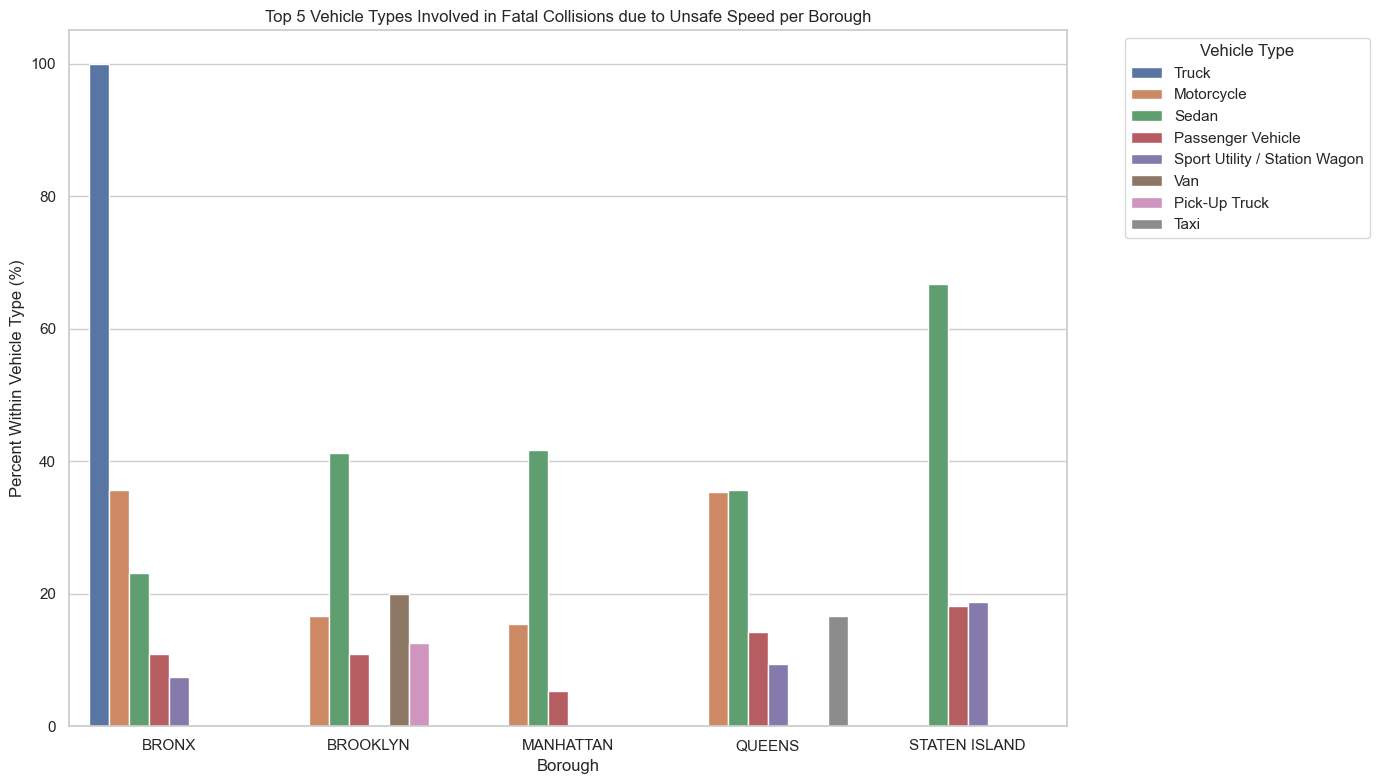

In [91]:
# Filter for top 5 vehicle types per borough based on PERCENT_WITHIN_VEHICLE
top5_per_borough = ( vf_killed_counts_borough.sort_values(['BOROUGH', 'PERCENT_WITHIN_VEHICLE'], ascending=[True, False]).groupby('BOROUGH').head(5))

# Vehicle names
top5_per_borough['VEHICLE_TYPE'] = top5_per_borough['VEHICLE_TYPE'].str.title()

# Set plot size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Barplot
sns.barplot( data=top5_per_borough, x='BOROUGH',  y='PERCENT_WITHIN_VEHICLE', hue='VEHICLE_TYPE')

# Titles and labels
plt.title('Top 5 Vehicle Types Involved in Fatal Collisions due to Unsafe Speed per Borough')
plt.ylabel('Percent Within Vehicle Type (%)')
plt.xlabel('Borough')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/top5_vehicle_types_for_killed_unsafespeed_per_borough_NYC.png', dpi=300)
plt.show()

### &nbsp;&nbsp;&nbsp;&nbsp;2.8 Collision hotspots

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.8.1 Top 10 streets with most injuries

In [92]:
borough_counts = (
    df[['STREET', 'BOROUGH']]
    .dropna(subset=['STREET', 'BOROUGH'])
    .value_counts()
    .reset_index(name='count')
)
# Drop rows with missing STREET or BOROUGH just for mapping
street_borough_map = (
    borough_counts
    .sort_values('count', ascending=False)
    .drop_duplicates(subset='STREET')  # keep most frequent BOROUGH per STREET
    .drop(columns='count')
)

# Group by STREET and CONTRIBUTING FACTOR VEHICLE 1, summing injuries and fatalities
df_street_factors = (df.groupby(['STREET', 'CONTRIBUTING FACTOR VEHICLE 1'], dropna=True)[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]
    .sum().reset_index())

# Add total casualties column
df_street_factors['TOTAL_CASUALTIES'] = (df_street_factors['NUMBER OF PERSONS INJURED'] + df_street_factors['NUMBER OF PERSONS KILLED'])

# Merge the most common borough per street
df_street_factors = df_street_factors.merge(street_borough_map, on='STREET', how='left')

# Sort by total casualties in descending order
df_street_factors = df_street_factors.sort_values('TOTAL_CASUALTIES', ascending=False)

In [93]:
df_street_factors.head(20)

,STREET,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,TOTAL_CASUALTIES,BOROUGH
180641,LINDEN BOULEVARD,Unspecified,1360,5,1365,BROOKLYN
147308,ATLANTIC AVENUE,Unspecified,1330,8,1338,BROOKLYN
152896,BROADWAY,Unspecified,1050,7,1057,MANHATTAN
151091,BELT PARKWAY,Driver Inattention/Distraction,989,0,989,BROOKLYN
151100,BELT PARKWAY,Following Too Closely,844,0,844,BROOKLYN
170619,FLATBUSH AVENUE,Unspecified,821,9,830,BROOKLYN
181037,LONG ISLAND EXPRESSWAY,Following Too Closely,821,0,821,QUEENS
147269,ATLANTIC AVENUE,Driver Inattention/Distraction,717,0,717,BROOKLYN
73704,3 AVENUE,Unspecified,697,4,701,MANHATTAN
173189,GRAND CENTRAL PKWY,Following Too Closely,686,1,687,QUEENS


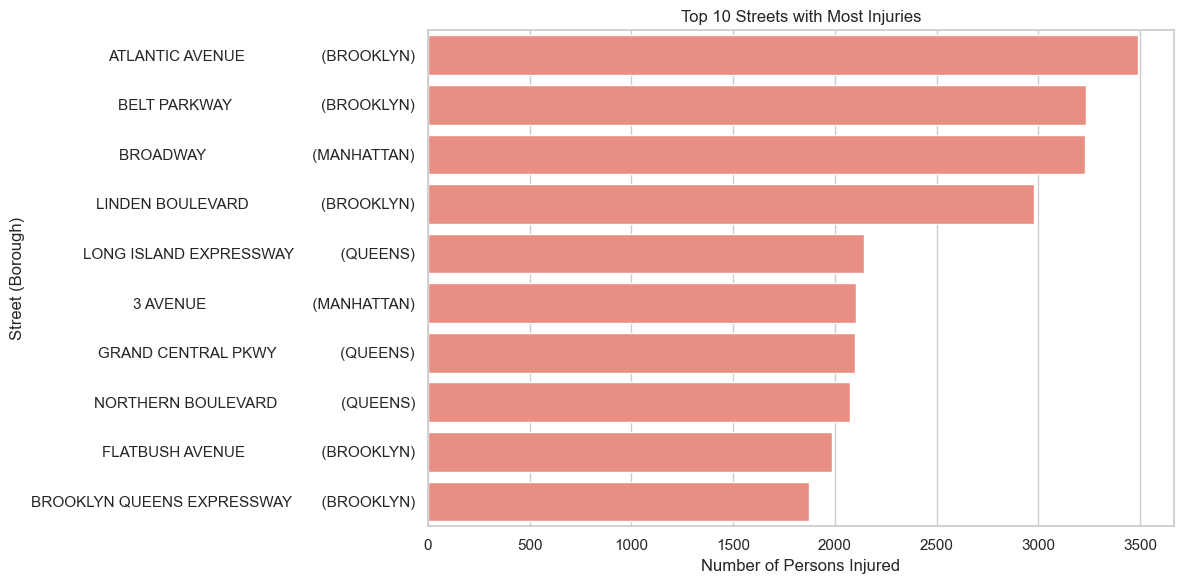

In [94]:
# Get top 10 streets by total injuries
top10_injured_streets = (df_street_factors.groupby(['STREET', 'BOROUGH'], as_index=False)['NUMBER OF PERSONS INJURED'].sum()
    .sort_values('NUMBER OF PERSONS INJURED', ascending=False).head(10))

# Combine street and borough for labels
top10_injured_streets['LABEL'] = top10_injured_streets['STREET'] + ' (' + top10_injured_streets['BOROUGH'] + ')'

# Plot
plt.figure(figsize=(12, 6))
sns.barplot( data=top10_injured_streets, y='LABEL', x='NUMBER OF PERSONS INJURED',color='salmon')

plt.xlabel('Number of Persons Injured')
plt.ylabel('Street (Borough)')
plt.title('Top 10 Streets with Most Injuries')
plt.tight_layout()
plt.savefig('plots/top10_injured_streets.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.8.2 Top 10 streets with most killed

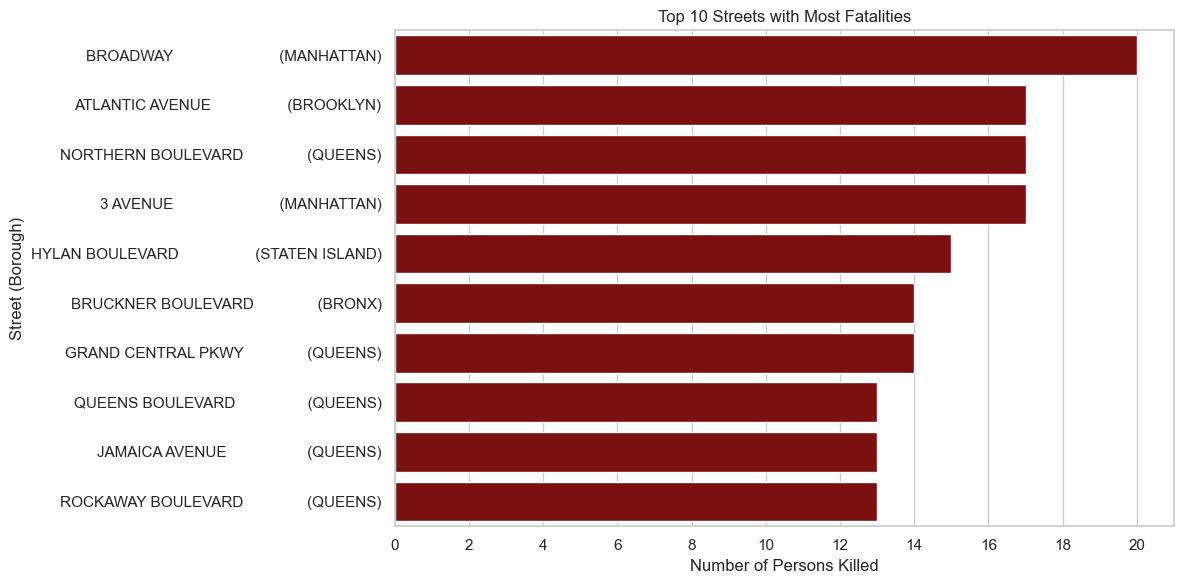

In [95]:
# Get top 10 streets by number of persons killed
top10_killed_streets = (df_street_factors.groupby(['STREET', 'BOROUGH'], as_index=False)['NUMBER OF PERSONS KILLED'].sum()
    .sort_values('NUMBER OF PERSONS KILLED', ascending=False).head(10))

# Combine street and borough for labels
top10_killed_streets['LABEL'] = top10_killed_streets['STREET'] + ' (' + top10_killed_streets['BOROUGH'] + ')'

# Plot
plt.figure(figsize=(12, 6))
sns.barplot( data=top10_killed_streets, y='LABEL', x='NUMBER OF PERSONS KILLED', color='darkred')

# Set x-ticks every 2
max_killed = top10_killed_streets['NUMBER OF PERSONS KILLED'].max()
plt.xticks(np.arange(0, max_killed + 2, 2))

plt.xlabel('Number of Persons Killed')
plt.ylabel('Street (Borough)')
plt.title('Top 10 Streets with Most Fatalities')
plt.tight_layout()
plt.savefig('plots/top10_killed_streets.png', dpi=300)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.8.3 Top 3 contributing factors per top 10 most fatal streets

In [96]:
# Aggregate total killed per street & borough
top_killed_streets = (df_street_factors .groupby(['STREET', 'BOROUGH'], as_index=False)['NUMBER OF PERSONS KILLED'].sum()
    .sort_values('NUMBER OF PERSONS KILLED', ascending=False).head(10))

# Merge with df_street_factors to get factors for these streets
top_killed_with_factors = top_killed_streets.merge(df_street_factors[['STREET', 'CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS KILLED', 'BOROUGH']], on='STREET', how='left', suffixes=('_total', '_factor'))

# Check column names
# print(top_killed_with_factors.columns)

# Filter rows where borough matches and killed count > 0
mask = (
    (top_killed_with_factors['BOROUGH_total'] == top_killed_with_factors['BOROUGH_factor']) &
    (top_killed_with_factors['NUMBER OF PERSONS KILLED_factor'] > 0)
)
top_killed_with_factors = top_killed_with_factors[mask]

# Rename columns
top_killed_with_factors = top_killed_with_factors.rename(columns={
    'BOROUGH_total': 'BOROUGH',
    'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR',
    'NUMBER OF PERSONS KILLED_total': 'TOTAL_KILLED',
    'NUMBER OF PERSONS KILLED_factor': 'KILLED_BY_FACTOR'
})

top_killed_with_factors[['STREET', 'BOROUGH', 'FACTOR', 'KILLED_BY_FACTOR', 'TOTAL_KILLED']]

,STREET,BOROUGH,FACTOR,KILLED_BY_FACTOR,TOTAL_KILLED
0,BROADWAY,MANHATTAN,Unspecified,7,20
1,BROADWAY,MANHATTAN,Driver Inattention/Distraction,4,20
2,BROADWAY,MANHATTAN,Failure to Yield Right-of-Way,2,20
4,BROADWAY,MANHATTAN,Traffic Control Disregarded,3,20
12,BROADWAY,MANHATTAN,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,1,20
...,...,...,...,...,...
413,JAMAICA AVENUE,QUEENS,Passenger Distraction,1,13
441,ROCKAWAY BOULEVARD,QUEENS,Unspecified,9,13
442,ROCKAWAY BOULEVARD,QUEENS,Driver Inattention/Distraction,1,13
443,ROCKAWAY BOULEVARD,QUEENS,Failure to Yield Right-of-Way,2,13


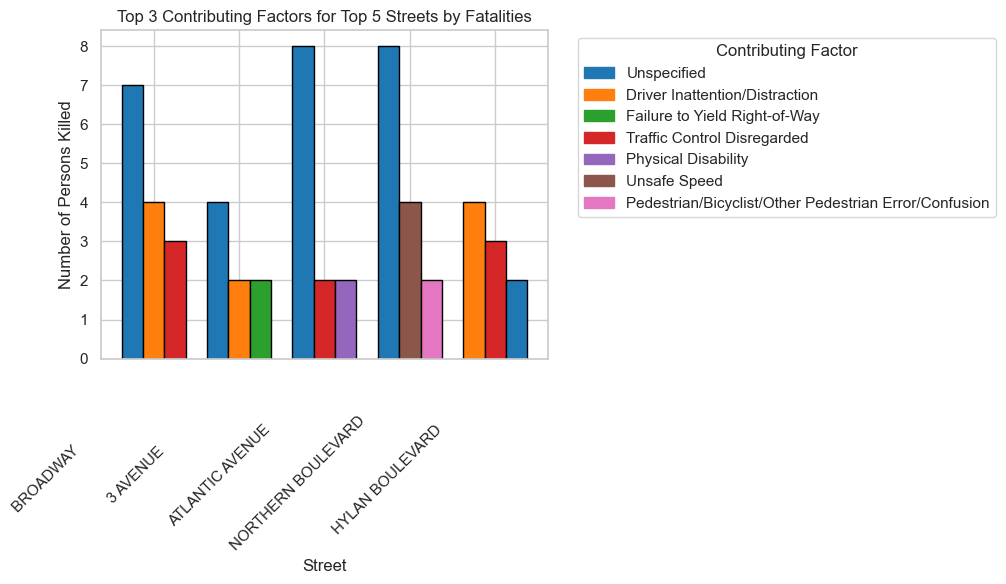

In [97]:
# Get top 5 streets by TOTAL_KILLED
top_5_streets = top_killed_with_factors.groupby('STREET')['TOTAL_KILLED'].max().nlargest(5).index

# Filter only those streets
filtered_data = top_killed_with_factors[top_killed_with_factors['STREET'].isin(top_5_streets)].copy()

# Sort and rank factors per street by number killed
filtered_data = filtered_data.sort_values(['STREET', 'KILLED_BY_FACTOR'], ascending=[True, False])
filtered_data['RANK'] = filtered_data.groupby('STREET').cumcount() + 1

# Keep only top 3 factors per street
top_factors_df = filtered_data[filtered_data['RANK'] <= 3]

# Prepare data for plotting
streets = top_5_streets.tolist()
factors = top_factors_df['FACTOR'].unique()

# Create a color map for factors
palette = sns.color_palette('tab10', n_colors=len(factors))
color_map = dict(zip(factors, palette))

bar_width = 0.25

# X positions for each street group
street_positions = np.arange(len(streets))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars per factor within each street
for i, street in enumerate(streets):
    street_data = top_factors_df[top_factors_df['STREET'] == street]
    factor_positions = street_positions[i] + np.arange(len(street_data)) * bar_width
    
    ax.bar( factor_positions, street_data['KILLED_BY_FACTOR'], width=bar_width,color=[color_map[f] for f in street_data['FACTOR']], edgecolor='black')

# Set x-ticks in the middle of the 3 bars per street
ax.set_xticks(street_positions + bar_width)
ax.set_xticklabels(streets, rotation=45, ha='right')

ax.set_ylabel('Number of Persons Killed')
ax.set_xlabel('Street')
ax.set_title('Top 3 Contributing Factors for Top 5 Streets by Fatalities')

# Custom legend for factors
handles = [mpatches.Patch(color=color_map[f], label=f) for f in factors]
ax.legend(handles=handles, title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
# plt.savefig('plots/top3_factors_killed_for_streets.png', dpi=300)
plt.show()

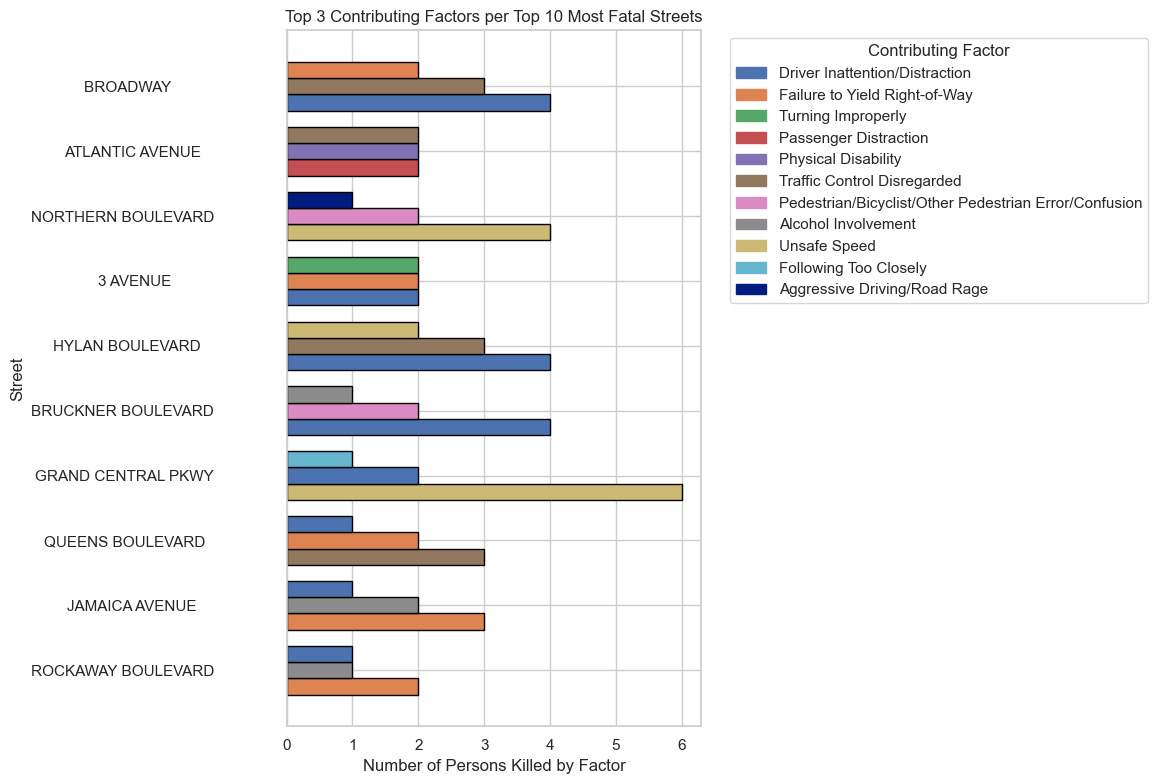

In [98]:
# Melt the factor columns into one
factor_cols = [col for col in df_street_factors.columns if col.startswith('CONTRIBUTING FACTOR')]
df_long = df_street_factors.melt( id_vars=['STREET', 'BOROUGH', 'NUMBER OF PERSONS KILLED'],value_vars=factor_cols, var_name='FACTOR_SOURCE', value_name='FACTOR').dropna(subset=['FACTOR'])

# Remove vague/unspecified entries
df_long = df_long[~df_long['FACTOR'].isin(['Unspecified'])]

# Get top 10 streets by total persons killed
top10_killed_streets = ( df_street_factors.groupby(['STREET', 'BOROUGH'], as_index=False)['NUMBER OF PERSONS KILLED'].sum()
    .sort_values('NUMBER OF PERSONS KILLED', ascending=False).head(10))

# Filter melted data to those 10 streets
top10_street_names = top10_killed_streets['STREET'].tolist()
filtered = df_long[df_long['STREET'].isin(top10_street_names)]

# STEP 4: Sum killed per factor per street
grouped_factors = (filtered.groupby(['STREET', 'FACTOR'], as_index=False)['NUMBER OF PERSONS KILLED'].sum()
    .rename(columns={'NUMBER OF PERSONS KILLED': 'KILLED_BY_FACTOR'}))

# Keep only top 3 factors per street
sorted_df = grouped_factors.sort_values(['STREET', 'KILLED_BY_FACTOR'], ascending=[True, False])
sorted_df['RANK'] = sorted_df.groupby('STREET').cumcount() + 1
top_factors_per_street = sorted_df[sorted_df['RANK'] <= 3].copy()

# Add total killed for correct sorting (already done)
top_factors_per_street = top_factors_per_street.merge( top10_killed_streets[['STREET', 'NUMBER OF PERSONS KILLED']],on='STREET')

# Use top10_killed_streets order for streets axis explicitly
streets = top10_killed_streets['STREET'].tolist()
factors = top_factors_per_street['FACTOR'].unique()

# Plot settings
deep = sns.color_palette('deep')
dark = sns.color_palette('dark')
combined = deep + dark

palette = combined[:len(factors)]
color_map = dict(zip(factors, palette))

bar_height = 0.25
fig, ax = plt.subplots(figsize=(12, 8))
street_positions = np.arange(len(streets))

# Plot each street in exact order of top10_killed_streets
for i, street in enumerate(streets):
    street_data = top_factors_per_street[top_factors_per_street['STREET'] == street]
    factor_positions = street_positions[i] - np.arange(len(street_data)) * bar_height
    
    ax.barh(factor_positions, street_data['KILLED_BY_FACTOR'], height=bar_height, color=[color_map[f] for f in street_data['FACTOR']], edgecolor='black')

ax.set_yticks(street_positions - bar_height)
ax.set_yticklabels(streets)
ax.invert_yaxis()

ax.set_xlabel('Number of Persons Killed by Factor')
ax.set_ylabel('Street')
ax.set_title('Top 3 Contributing Factors per Top 10 Most Fatal Streets')

handles = [mpatches.Patch(color=color_map[f], label=f) for f in factors]
ax.legend(handles=handles, title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('plots/top3_factors_killed_for_streets.png', dpi=300)
plt.show()

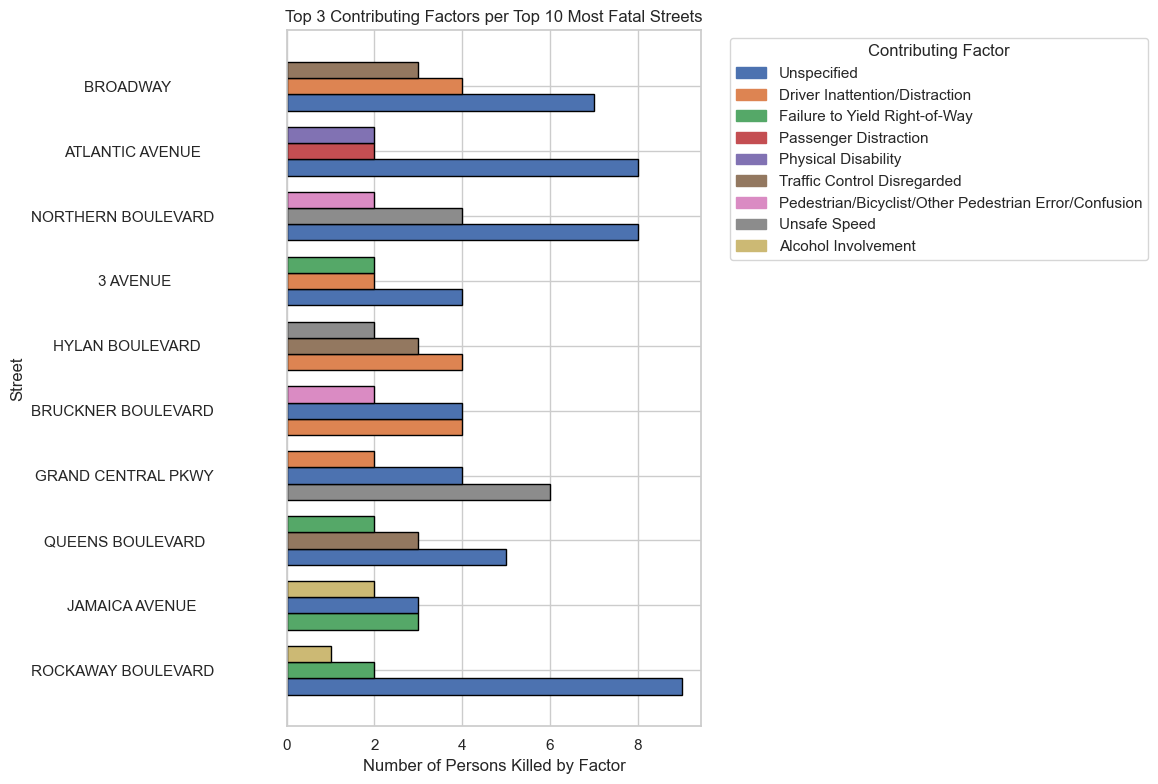

In [99]:
# Melt the factor columns into one
factor_cols = [col for col in df_street_factors.columns if col.startswith('CONTRIBUTING FACTOR')]
df_long = df_street_factors.melt(id_vars=['STREET', 'BOROUGH', 'NUMBER OF PERSONS KILLED'], value_vars=factor_cols, var_name='FACTOR_SOURCE', value_name='FACTOR').dropna(subset=['FACTOR'])

#  Get top 10 streets by total persons killed
top10_killed_streets = ( df_street_factors.groupby(['STREET', 'BOROUGH'], as_index=False)['NUMBER OF PERSONS KILLED'].sum()
    .sort_values('NUMBER OF PERSONS KILLED', ascending=False).head(10))

# Filter melted data to those 10 streets
top10_street_names = top10_killed_streets['STREET'].tolist()
filtered = df_long[df_long['STREET'].isin(top10_street_names)]

# Sum killed per factor per street
grouped_factors = (filtered.groupby(['STREET', 'FACTOR'], as_index=False)['NUMBER OF PERSONS KILLED'].sum().
    rename(columns={'NUMBER OF PERSONS KILLED': 'KILLED_BY_FACTOR'}))

# Keep only top 3 factors per street
sorted_df = grouped_factors.sort_values(['STREET', 'KILLED_BY_FACTOR'], ascending=[True, False])
sorted_df['RANK'] = sorted_df.groupby('STREET').cumcount() + 1
top_factors_per_street = sorted_df[sorted_df['RANK'] <= 3].copy()

# Add total killed for correct sorting (already done)
top_factors_per_street = top_factors_per_street.merge(top10_killed_streets[['STREET', 'NUMBER OF PERSONS KILLED']],on='STREET')

# Use top10_killed_streets order for streets axis explicitly
streets = top10_killed_streets['STREET'].tolist()

factors = top_factors_per_street['FACTOR'].unique()
palette = sns.color_palette('deep', n_colors=len(factors))
color_map = dict(zip(factors, palette))

bar_height = 0.25
fig, ax = plt.subplots(figsize=(12, 8))
street_positions = np.arange(len(streets))

# Plot each street in exact order of top10_killed_streets
for i, street in enumerate(streets):
    street_data = top_factors_per_street[top_factors_per_street['STREET'] == street]
    factor_positions = street_positions[i] - np.arange(len(street_data)) * bar_height
    
    ax.barh(factor_positions,street_data['KILLED_BY_FACTOR'],height=bar_height, color=[color_map[f] for f in street_data['FACTOR']],edgecolor='black')

ax.set_yticks(street_positions - bar_height)
ax.set_yticklabels(streets)
ax.invert_yaxis()

ax.set_xlabel('Number of Persons Killed by Factor')
ax.set_ylabel('Street')
ax.set_title('Top 3 Contributing Factors per Top 10 Most Fatal Streets')

handles = [mpatches.Patch(color=color_map[f], label=f) for f in factors]
ax.legend(handles=handles, title='Contributing Factor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('plots/top3_factors_killed_for_streets_all.png', dpi=300)
plt.show()